In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import date
#from google.colab import drive
#drive.mount('/content/drive')
import matplotlib.pyplot as plt
import random
from pylab import *
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import LSTM 

In [ ]:
import requests
from bs4 import BeautifulSoup
def dow(URL):  
# Website URL
    URL = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
    page = requests.get(URL)
    # parse html content
    web = BeautifulSoup(page.text, 'html.parser')
    table = web.find('table', class_='wikitable')
    tbody = table.find('tbody')
    trs = tbody.find_all('tr')
    tickers = []
    for tr in trs:
        st = str(tr.find_all('a', class_ = 'external text'))
        if len(st)>3:
            tickers.extend([st.split(sep='>')[1].split(sep='<')[0]])
    return tickers         

In [ ]:
URL = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
tickers = dow(URL)

In [ ]:
print(tickers)

['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'GS', 'HD', 'HON', 'INTC', 'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']


In [ ]:
NumberOfStocks = len(tickers)
print(NumberOfStocks)

30


In [ ]:
start = date(2020, 1,1)
end = date.today()
StockData = list(tickers)
for i in range(NumberOfStocks):
  StockData[i] = yf.download(tickers[i], start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
StockData[20]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  101.360001  102.209999  101.019997  102.199997   99.411613   
2020-01-03  100.589996  102.000000  100.309998  101.919998   99.139244   
2020-01-06  100.949997  101.839996  100.870003  101.830002   99.051704   
2020-01-07  101.809998  102.739998  100.809998  101.779999   99.003067   
2020-01-08  101.309998  102.139999  100.849998  101.550003   98.779343   
...                ...         ...         ...         ...         ...   
2022-12-06  109.650002  110.529999  106.750000  107.930000  107.930000   
2022-12-07  107.320000  109.120003  107.059998  108.330002  108.330002   
2022-12-08  108.599998  111.489998  108.459999  111.360001  111.360001   
2022-12-09  110.220001  111.379997  109.260002  109.419998  109.419998   
2022-12-12  110.099998  112.169998  109.709999  112.070000  112.070000   

             Volume  
Date                 
2020-01-02  5644100  
2020-01-03  4541800  
2020-01-06  4612400  
2020-01-07  6719900  
2020-01-08  4942200  
...             ...  
2022-12-06  7086100  
2022-12-07  5751500  
2022-12-08  6192800  
2022-12-09  5673200  
2022-12-12  6426000  

[743 rows x 6 columns]

# Visualization

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

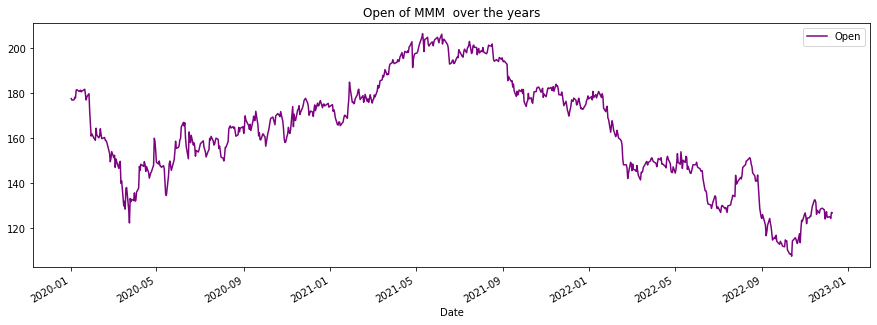

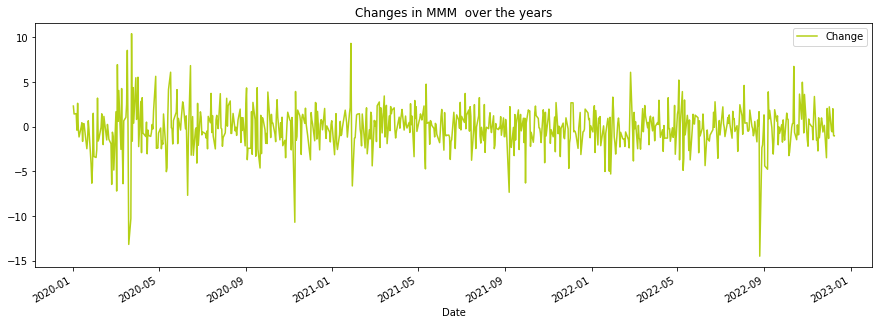

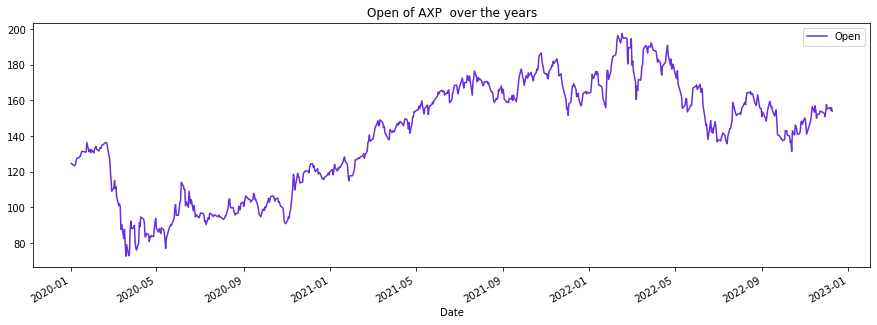

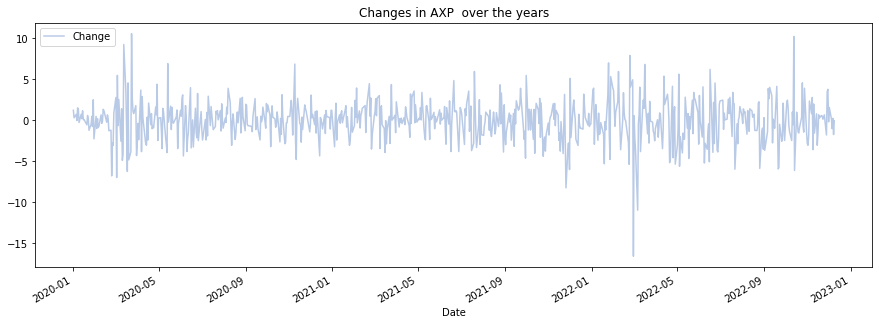

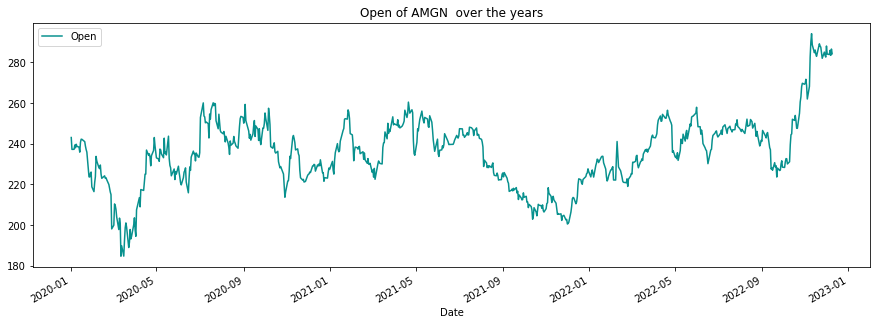

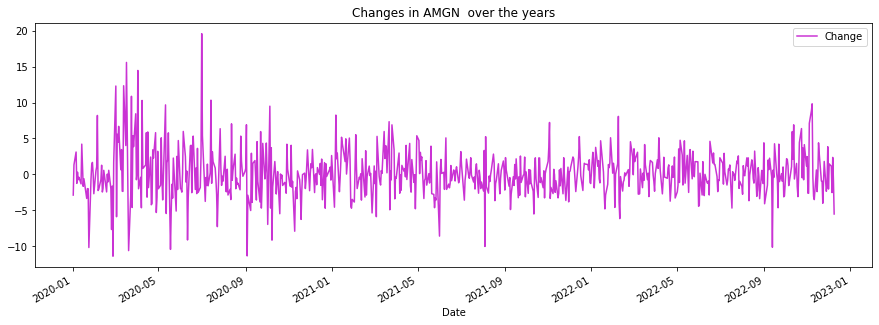

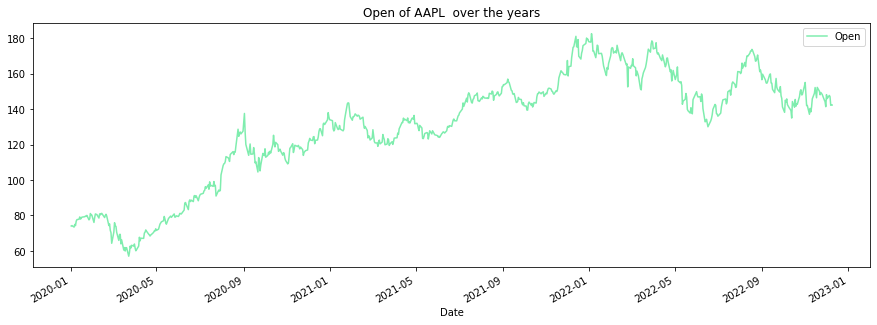

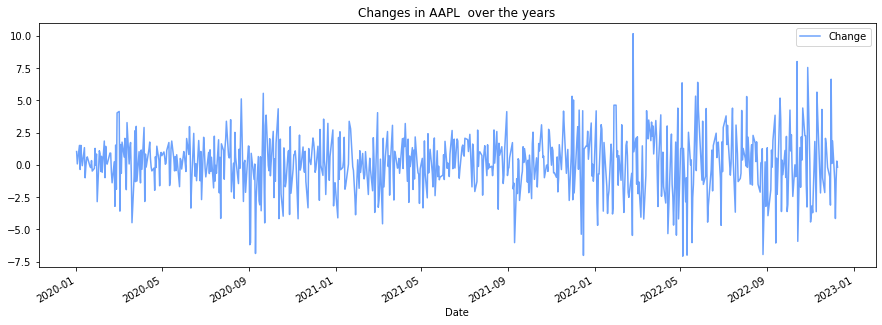

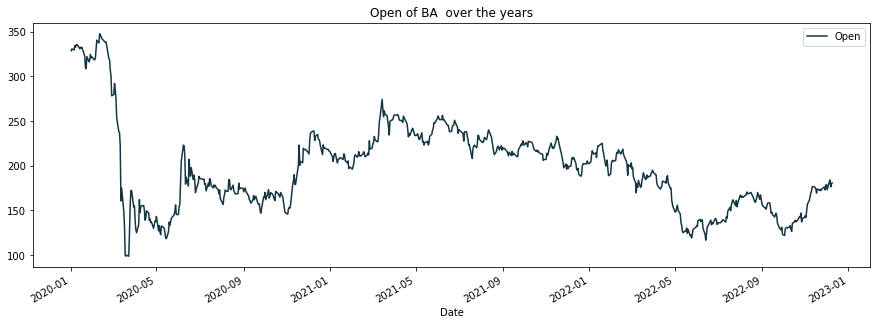

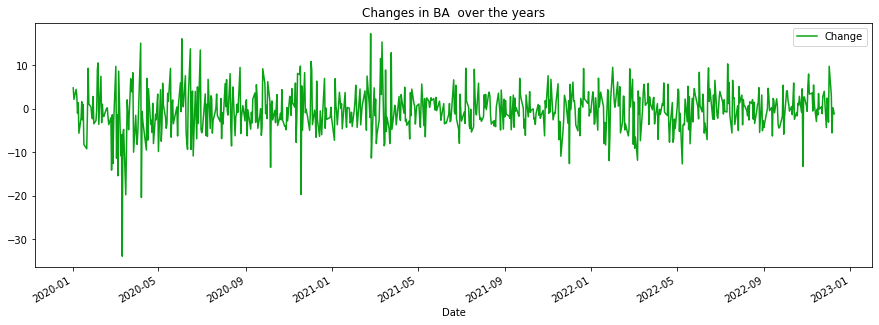

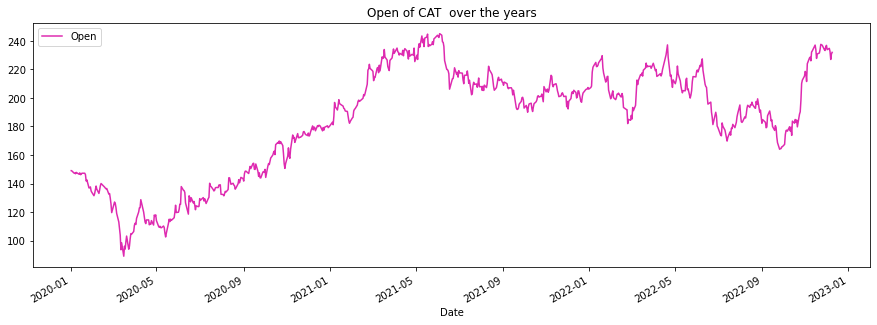

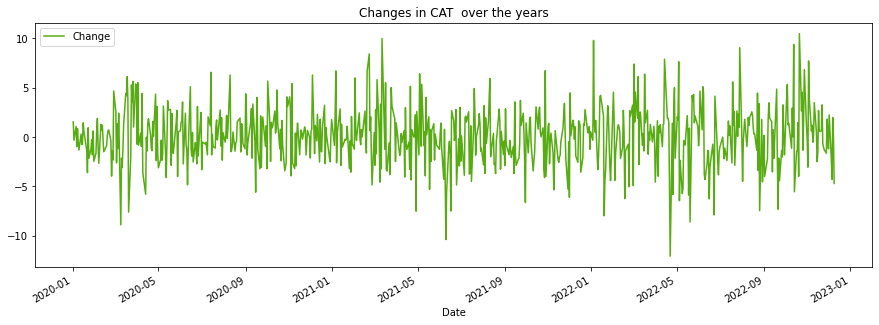

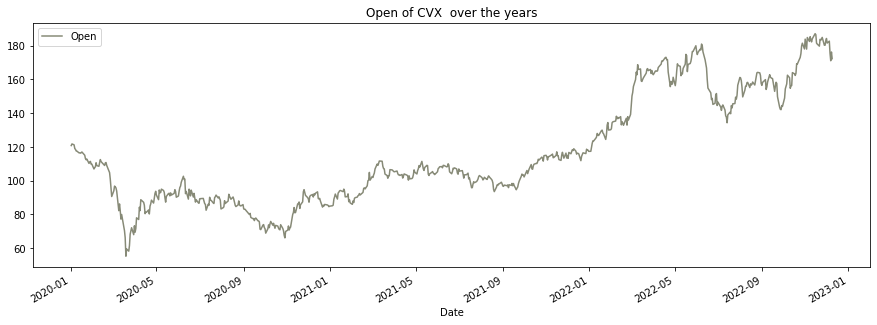

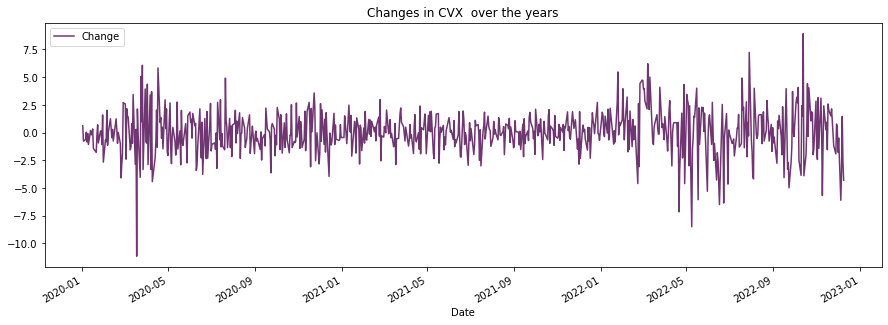

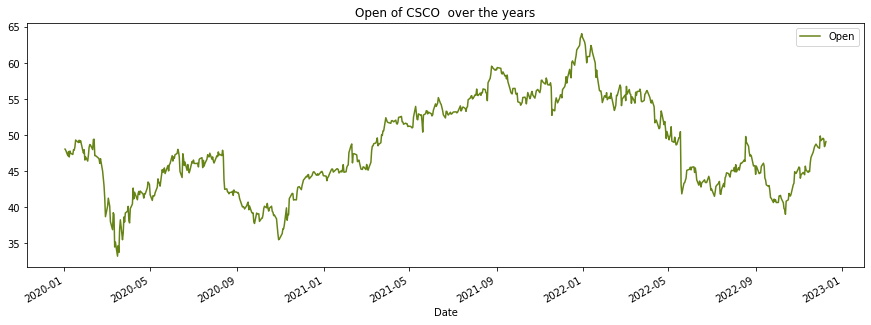

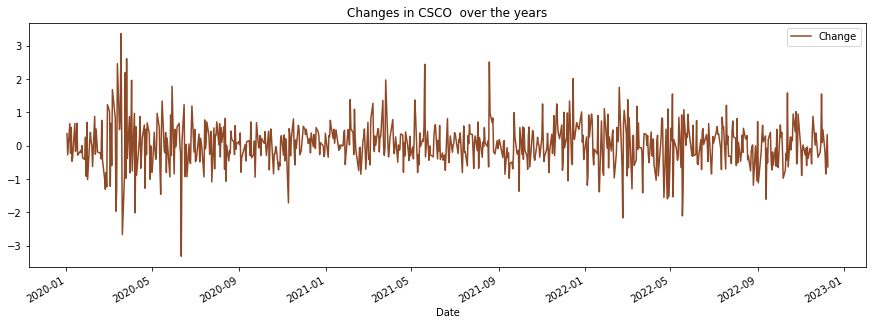

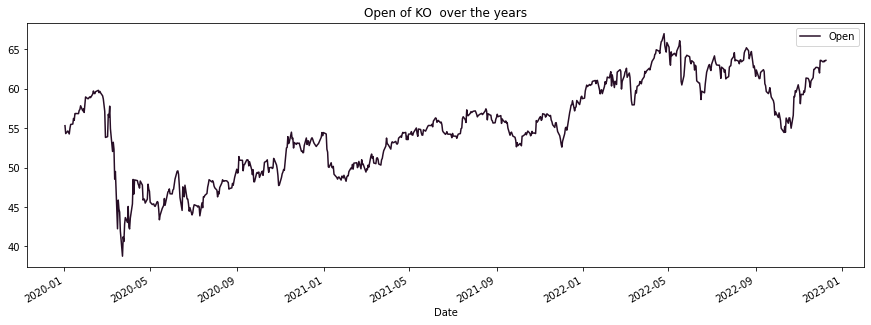

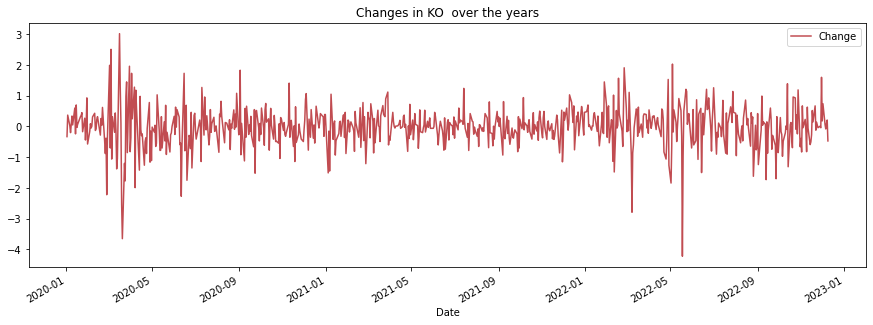

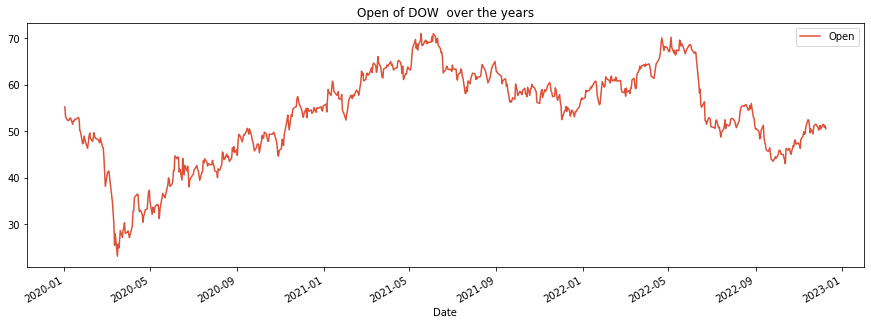

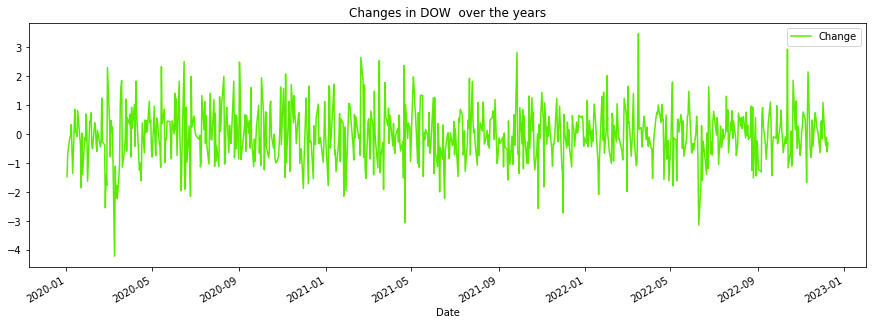

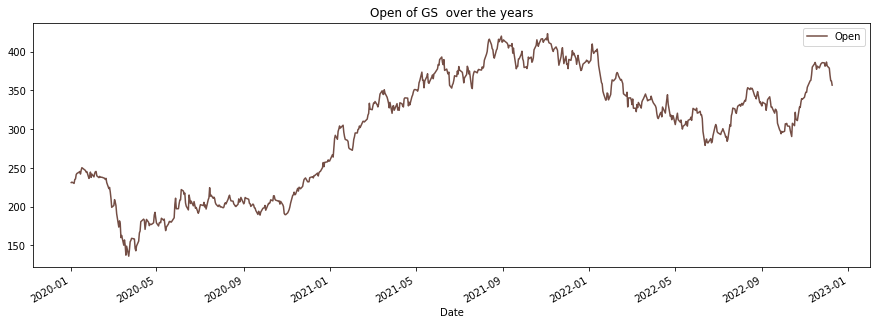

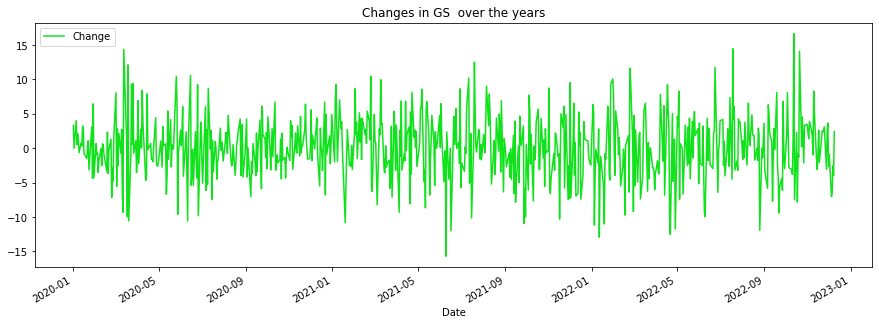

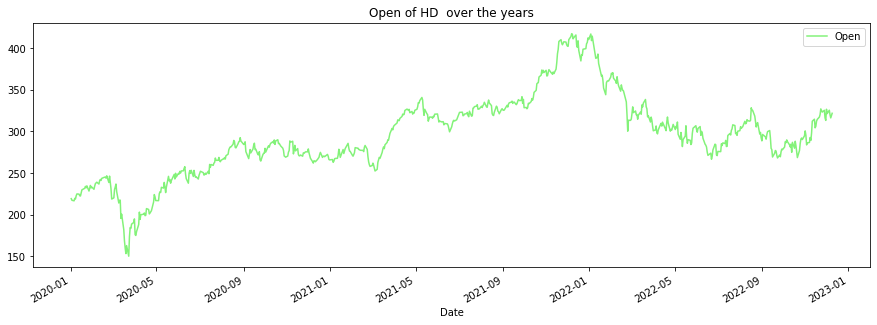

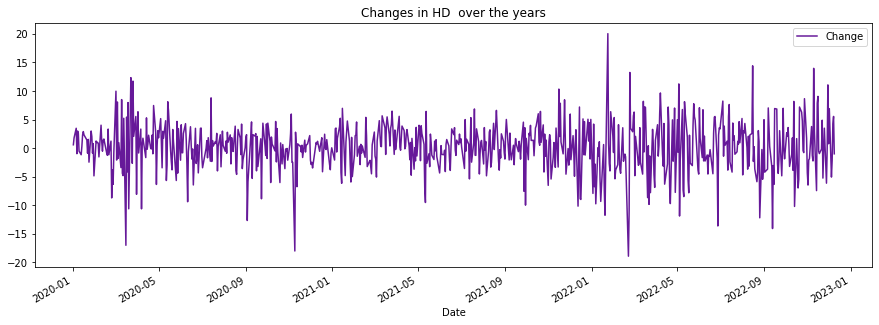

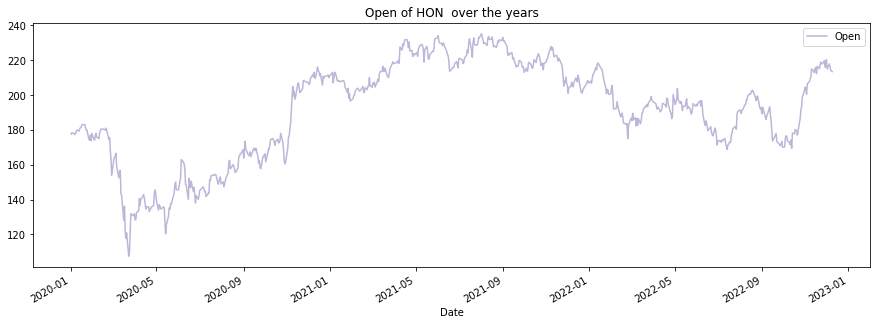

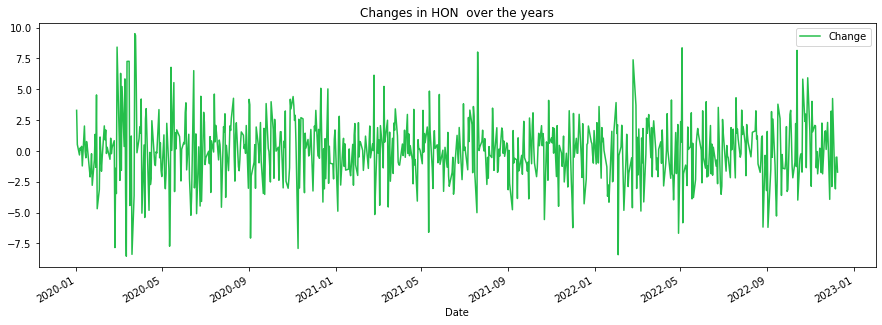

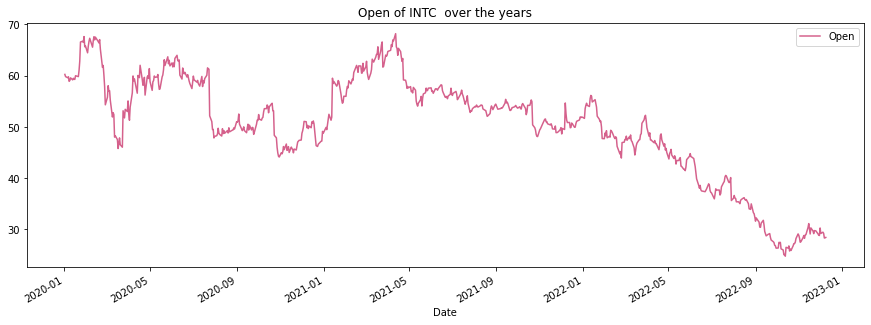

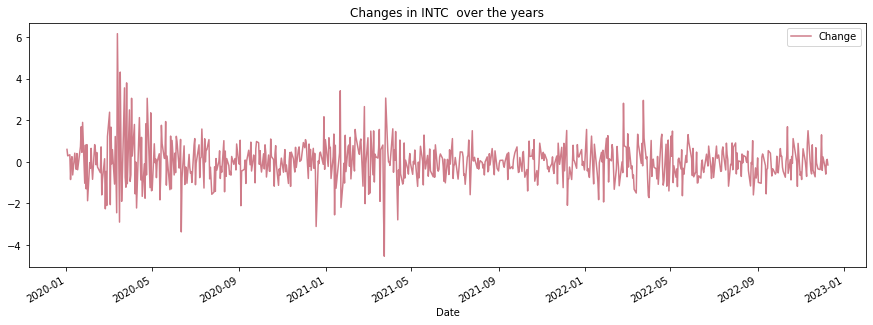

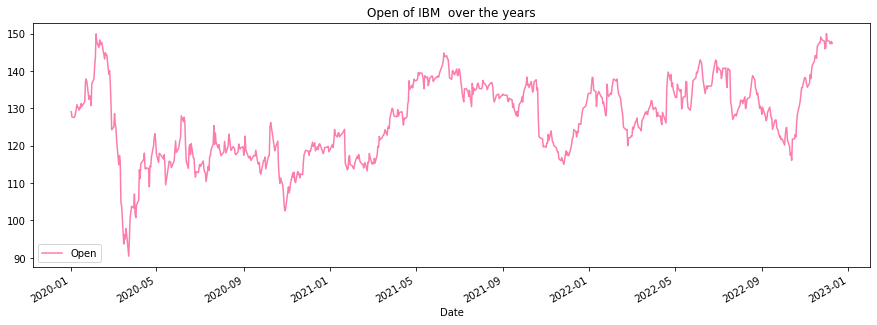

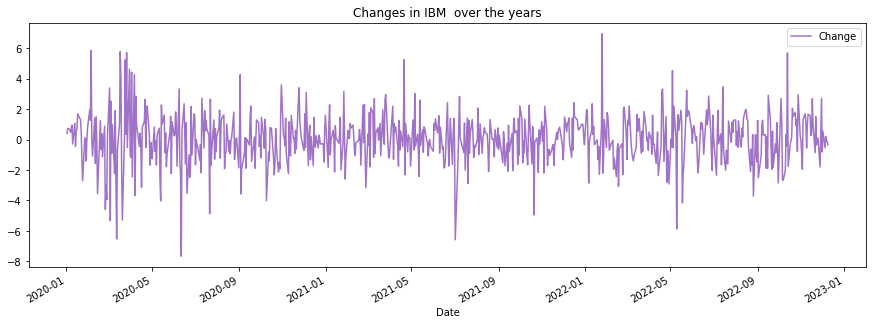

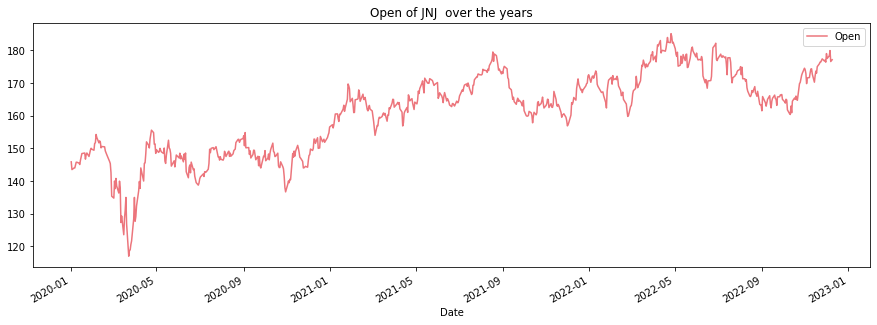

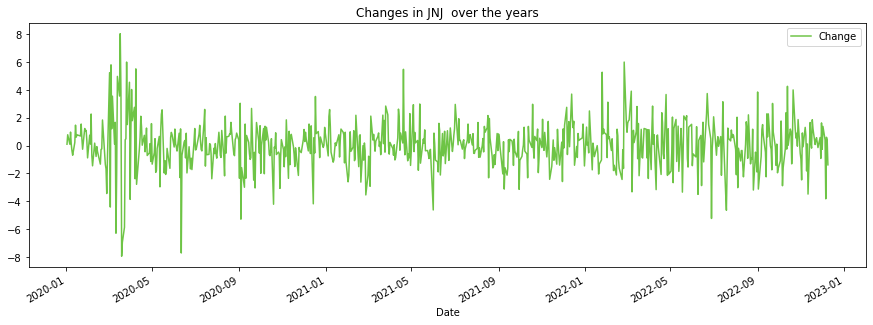

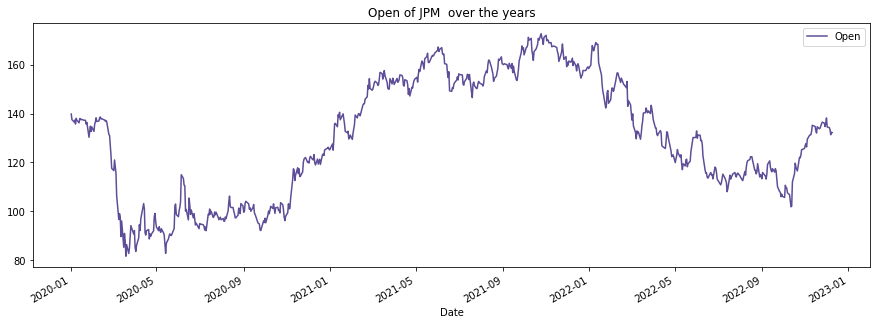

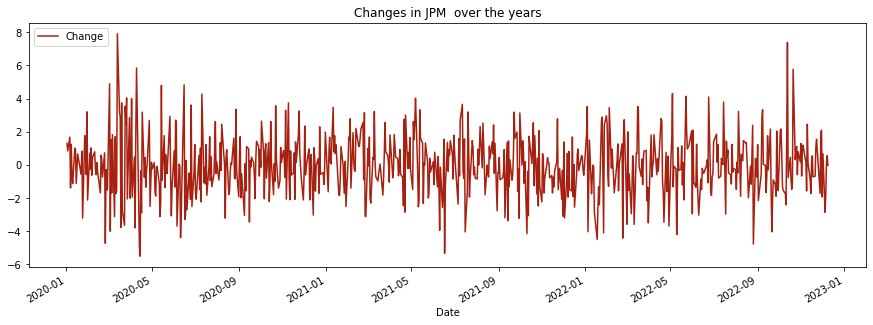

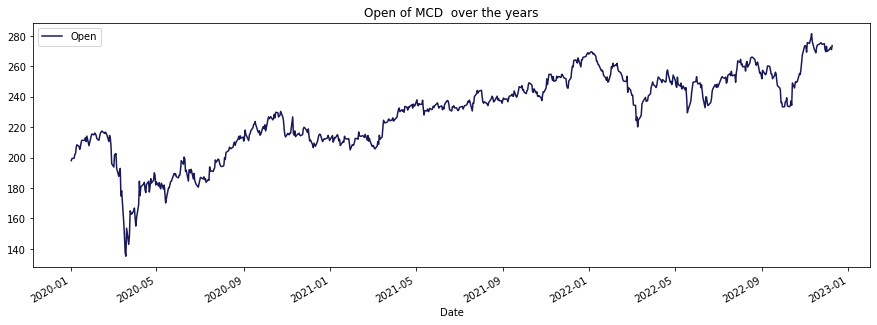

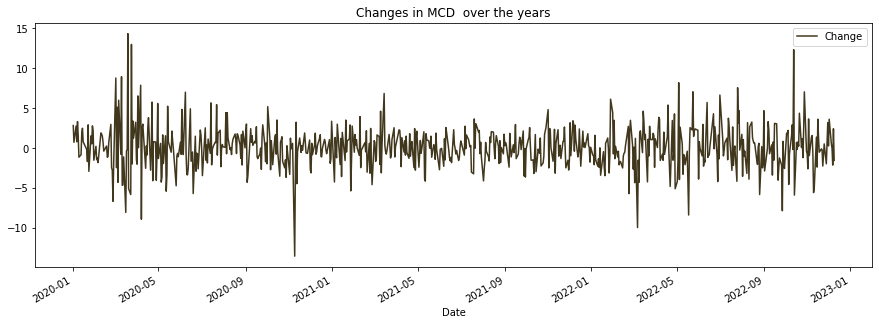

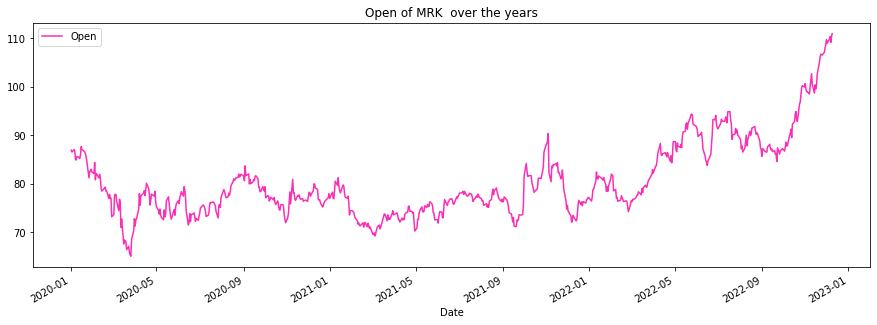

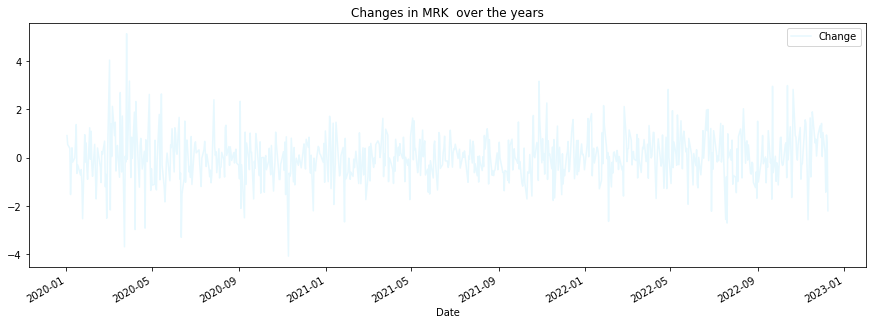

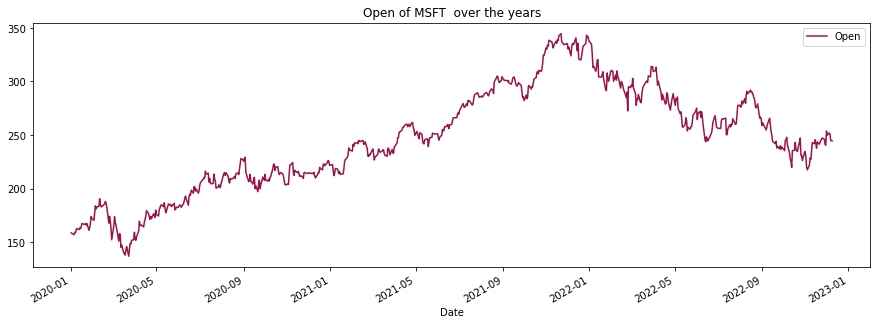

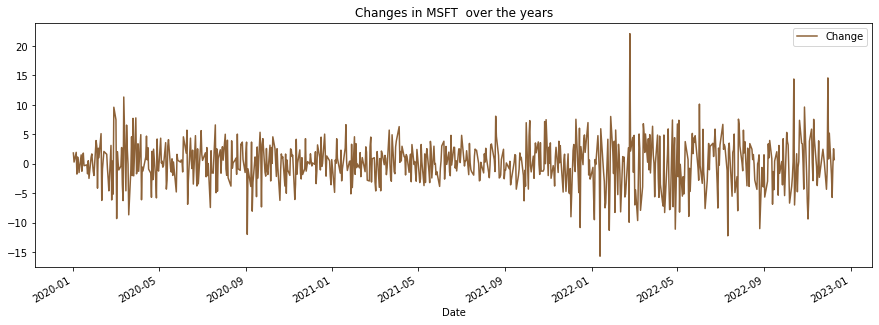

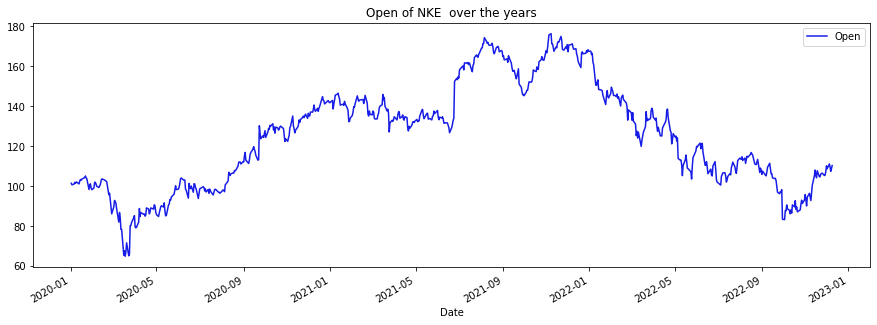

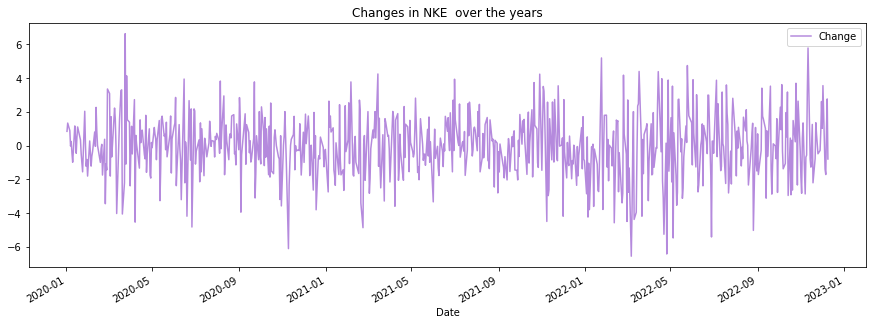

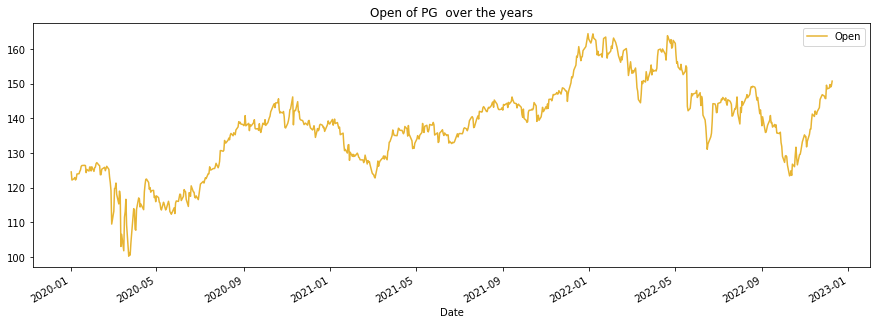

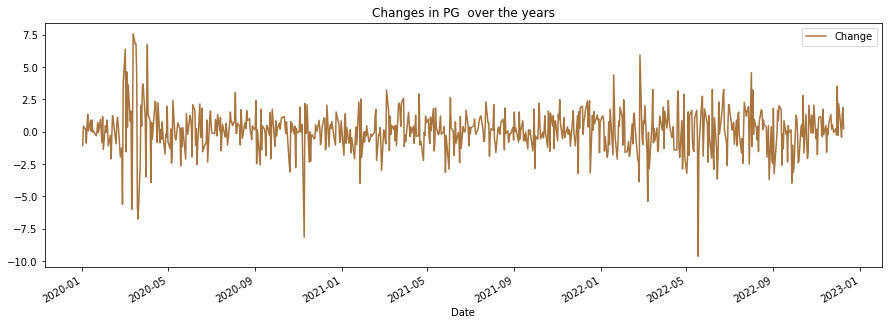

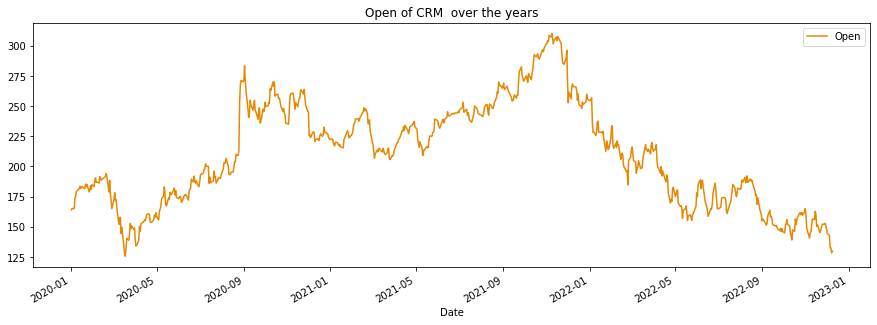

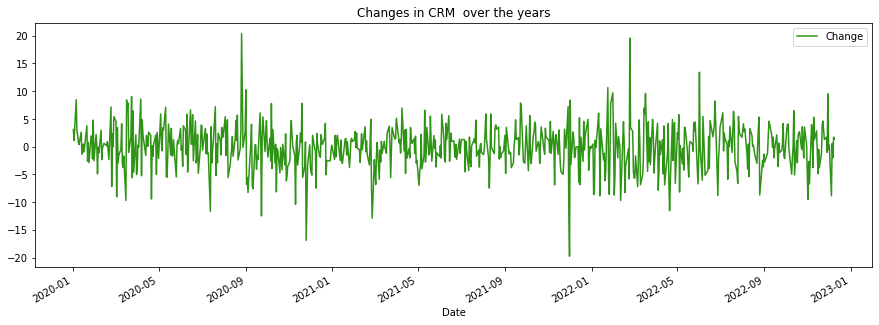

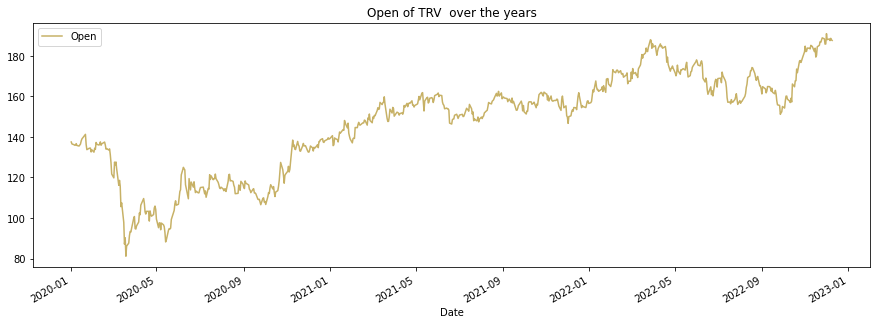

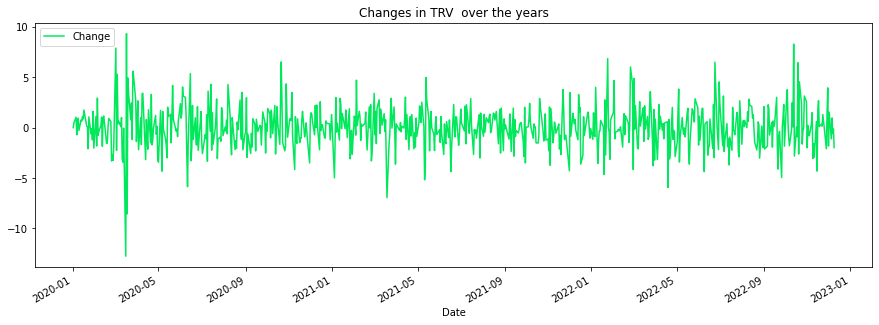

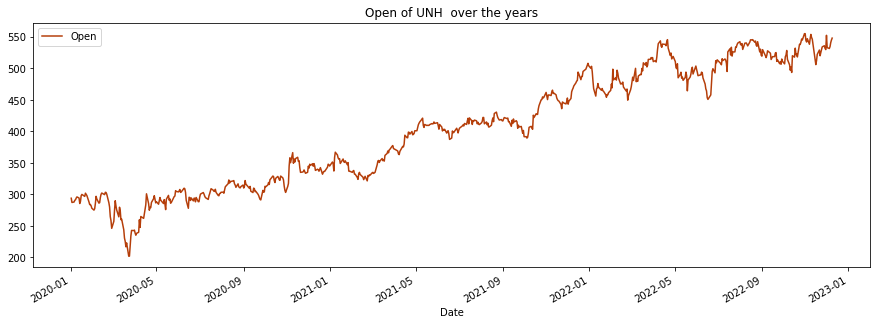

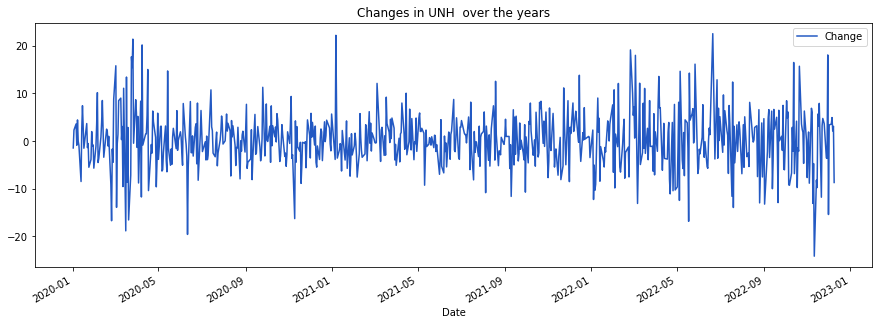

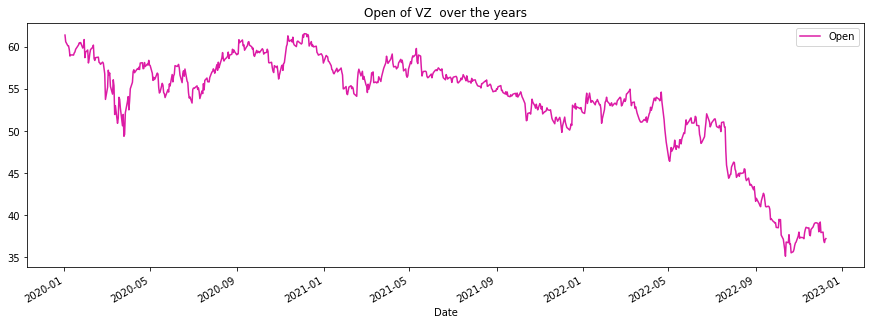

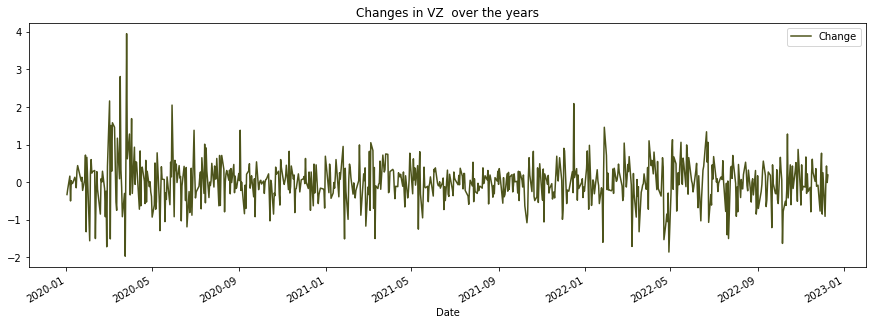

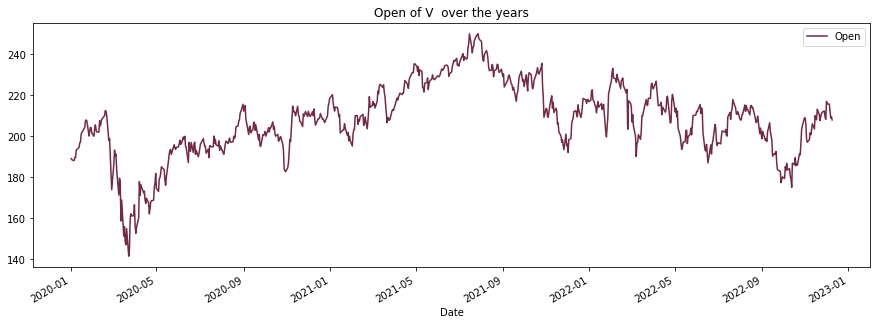

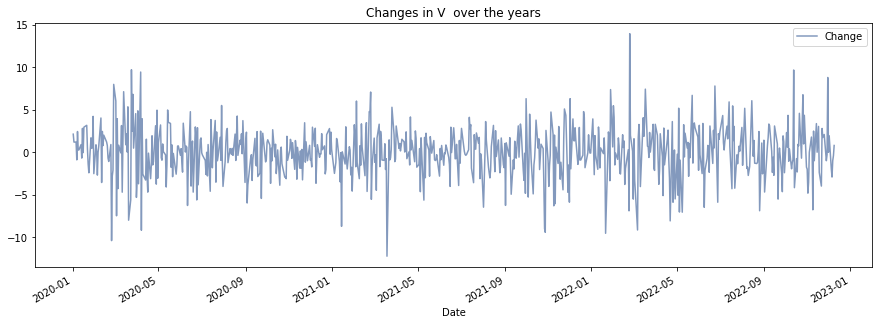

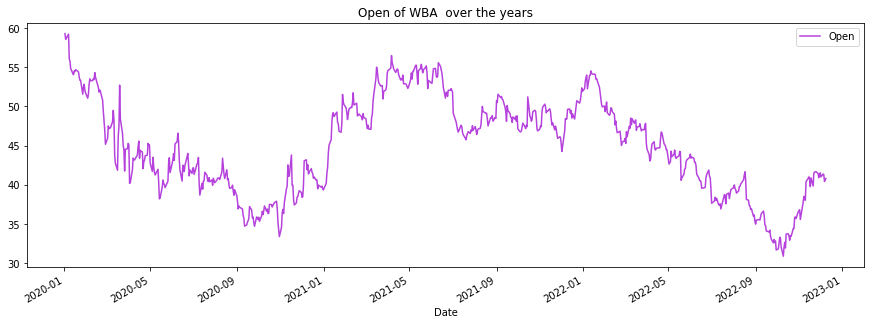

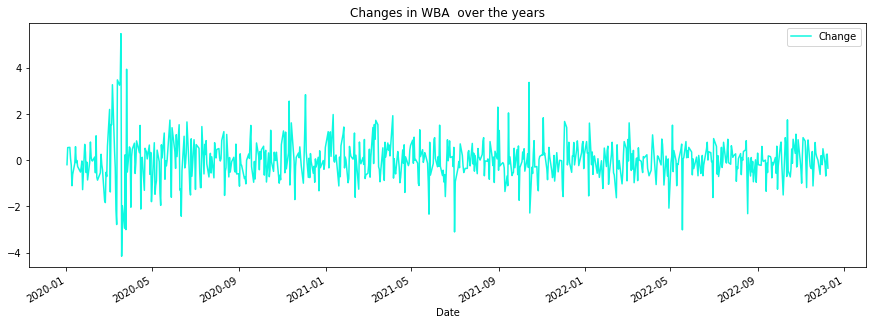

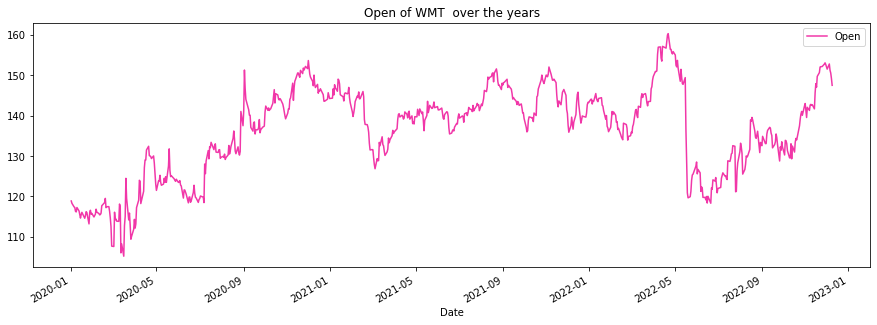

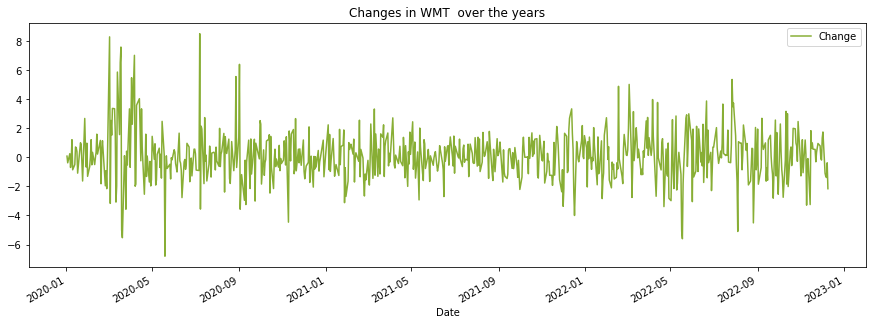

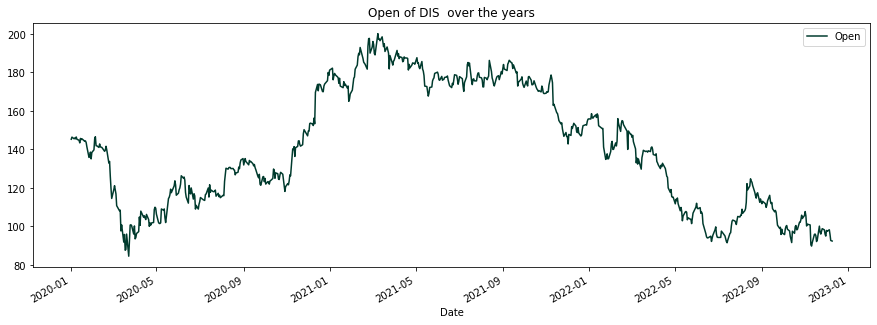

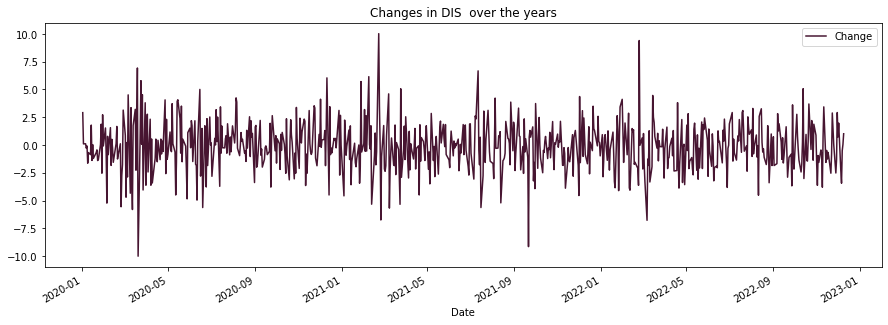

In [ ]:
for EachStock, ticker in zip(StockData, tickers):
  EachStock.plot(y ='Open',color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),figsize=(15,5),title='Open of ' +ticker+ '  over the years')
  EachStock.plot(y='Change',color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),figsize=(15,5),title ='Changes in '+ ticker+'  over the years')

Following are the major measures for prediction:
1. OHLC: An open-high-low-close chart is a type of chart typically used to illustrate movements in the price of a financial instrument over time.
2. HLC - High Low Close graph
3. Close - Closing price of day

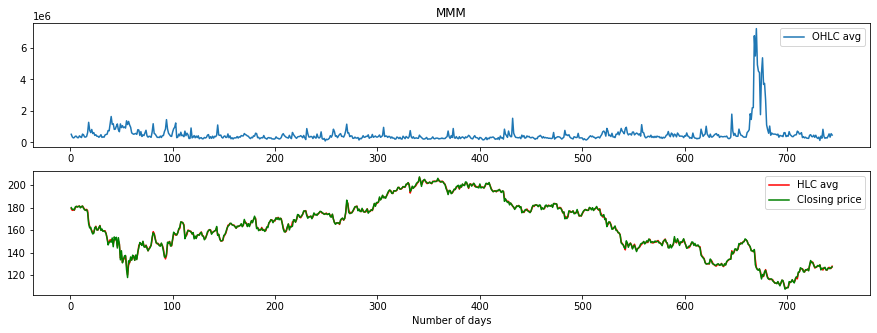

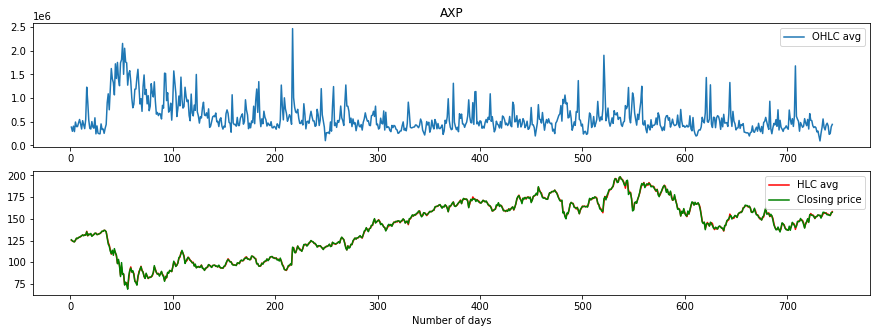

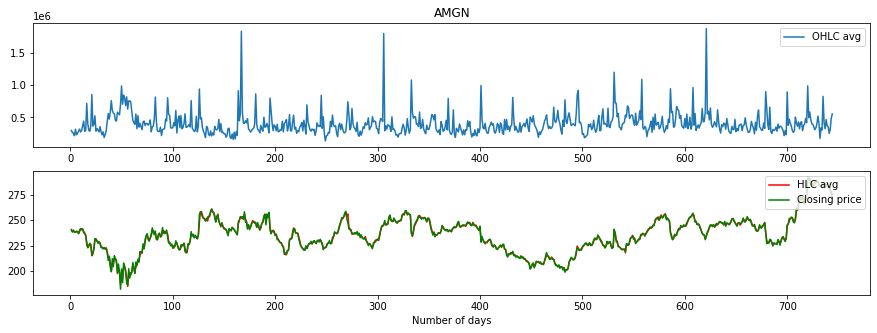

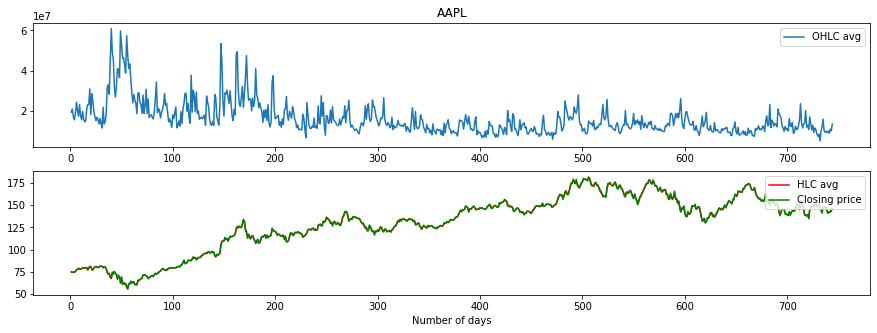

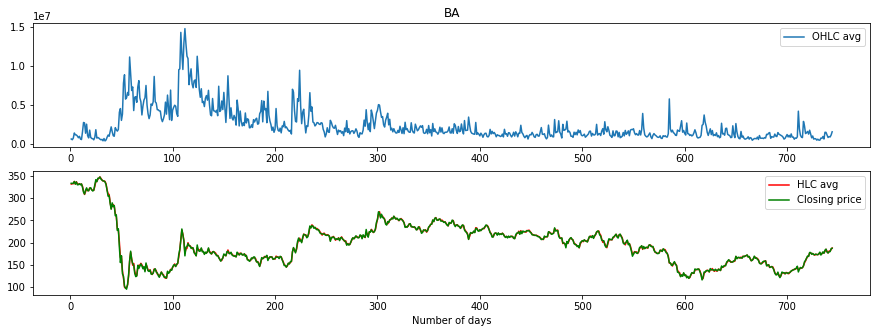

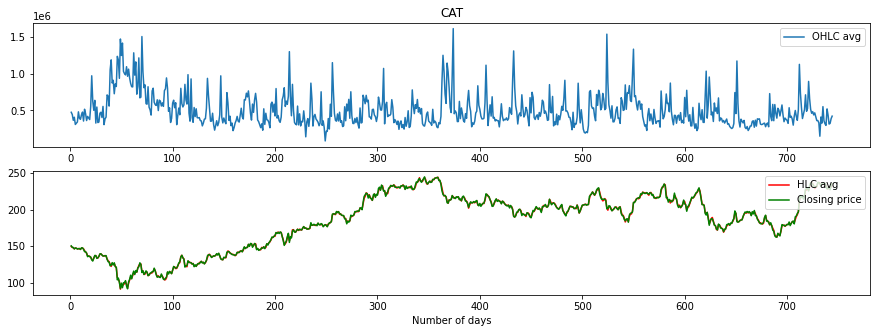

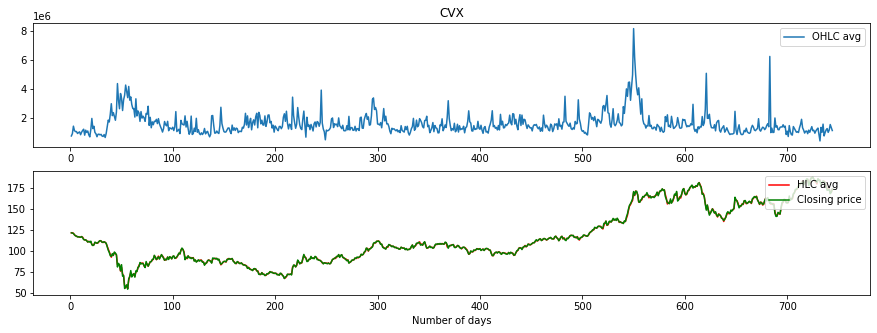

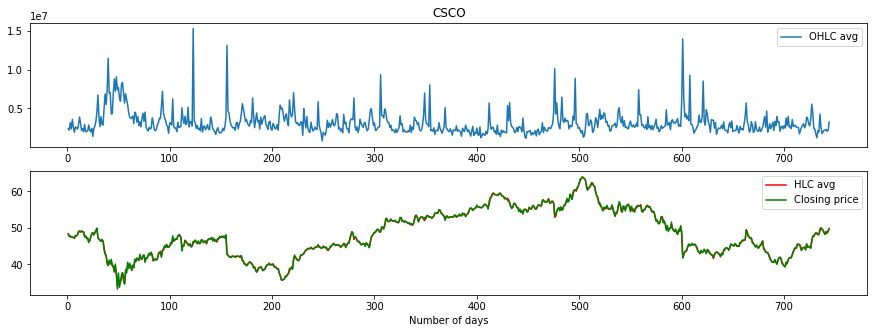

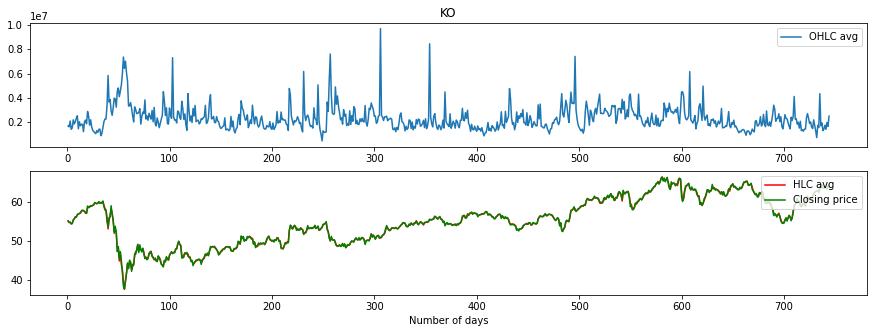

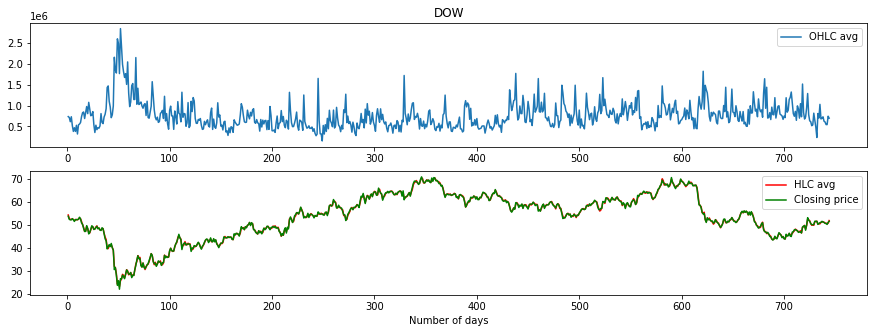

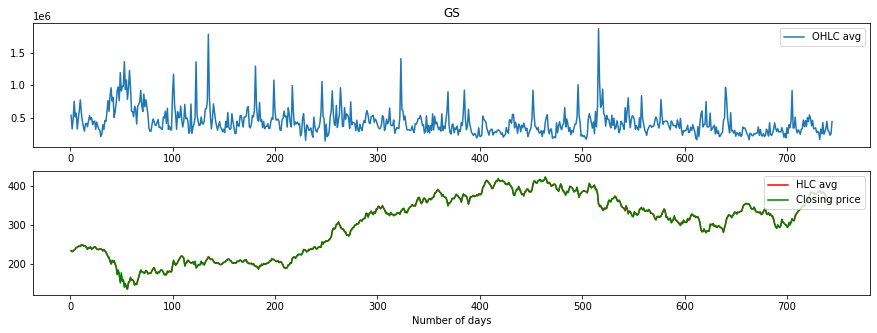

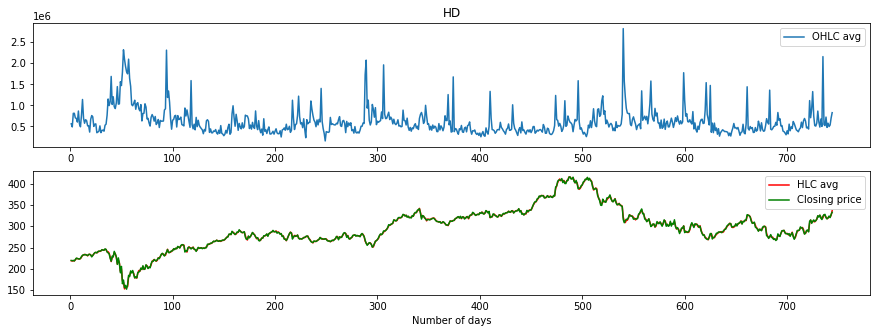

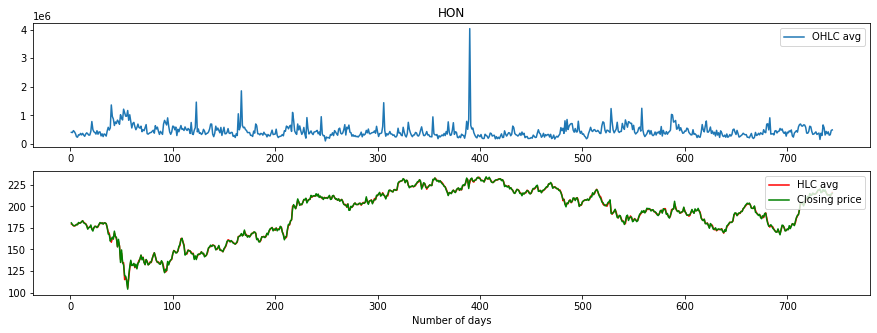

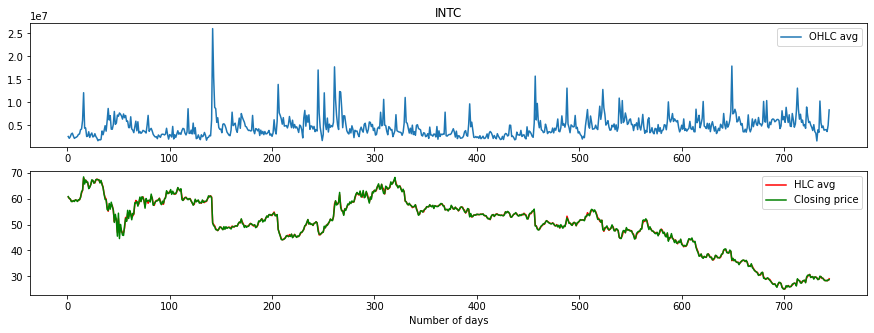

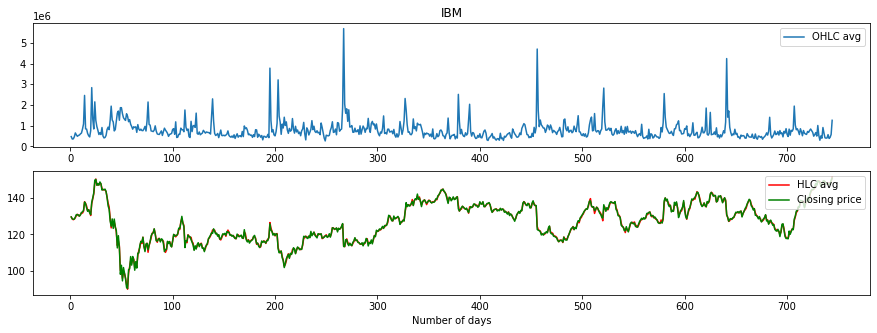

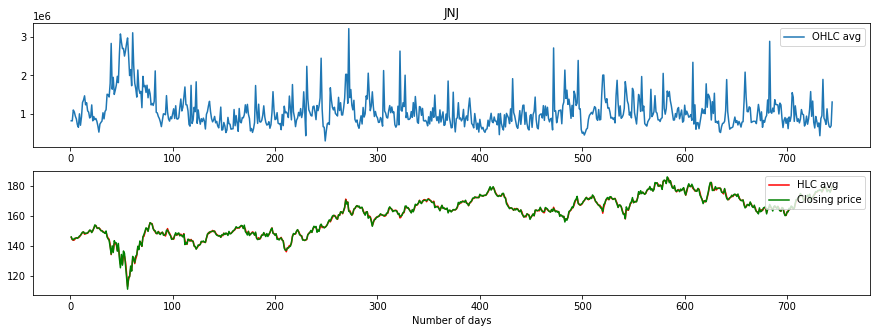

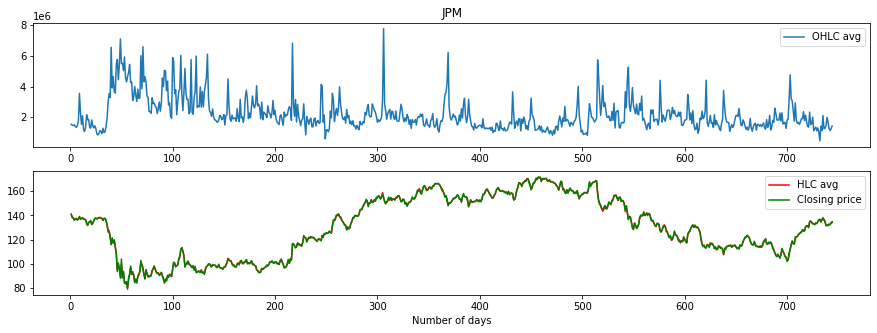

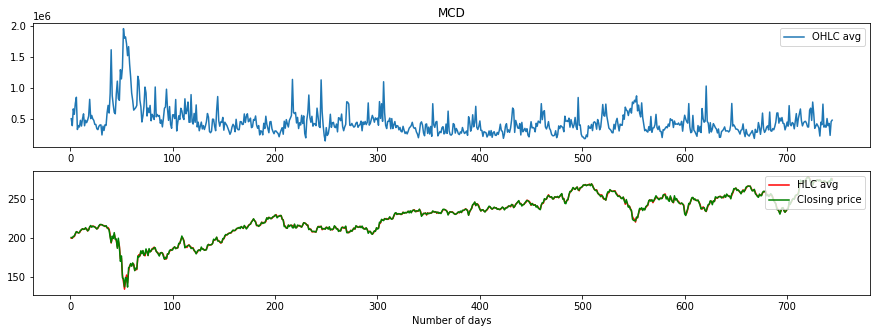

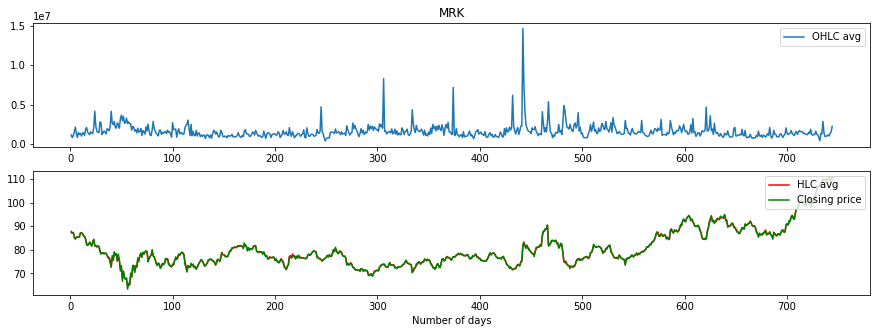

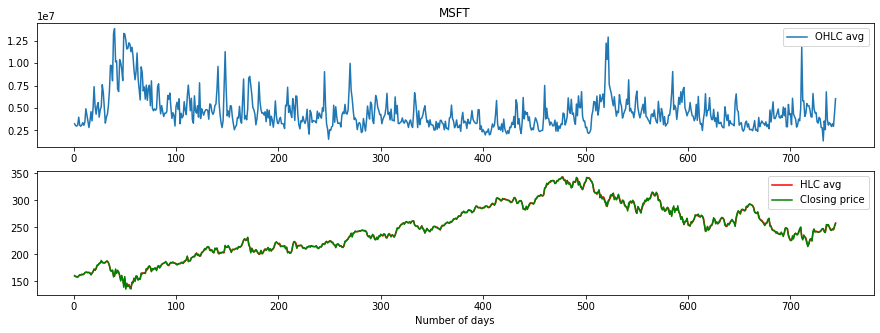

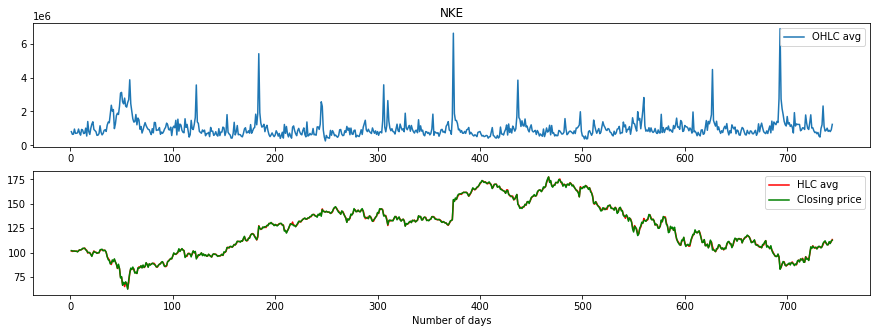

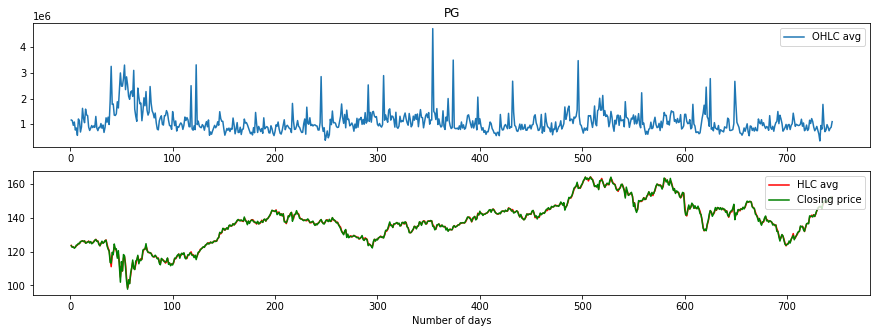

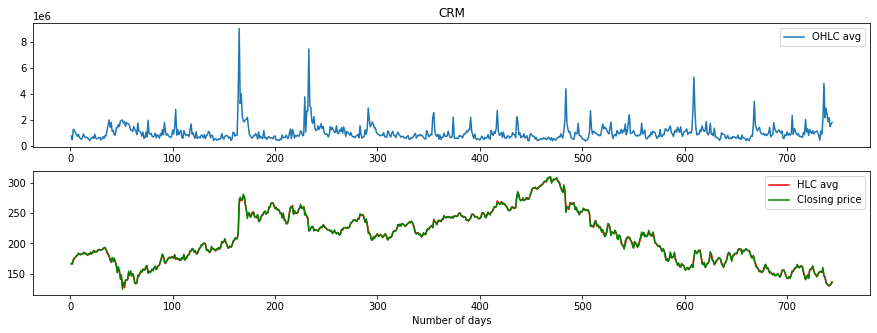

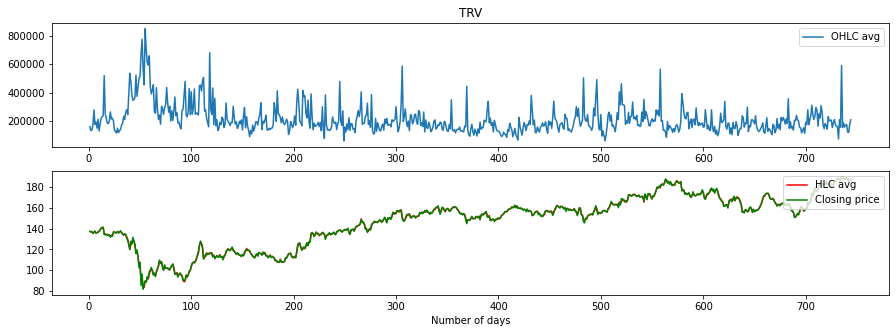

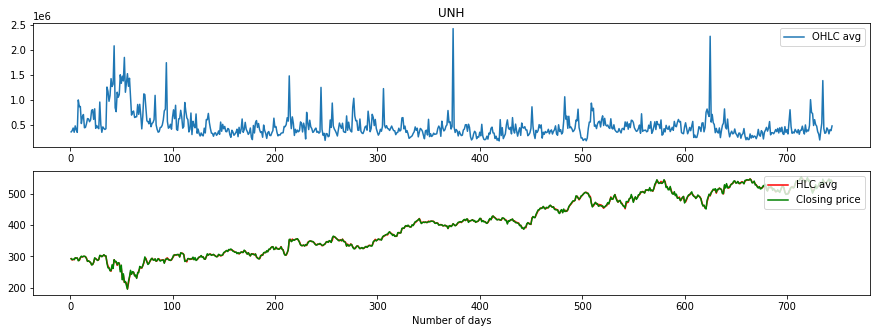

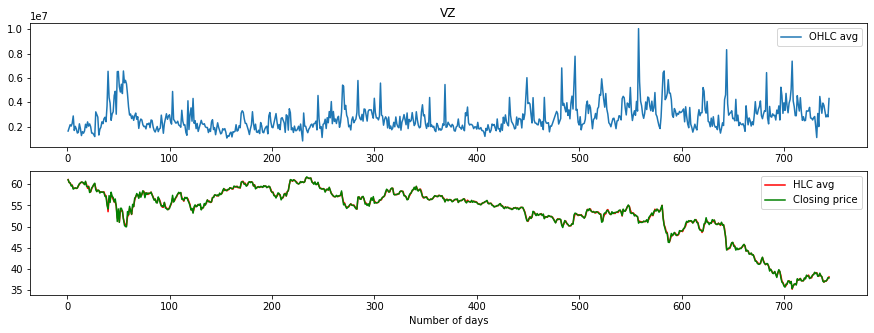

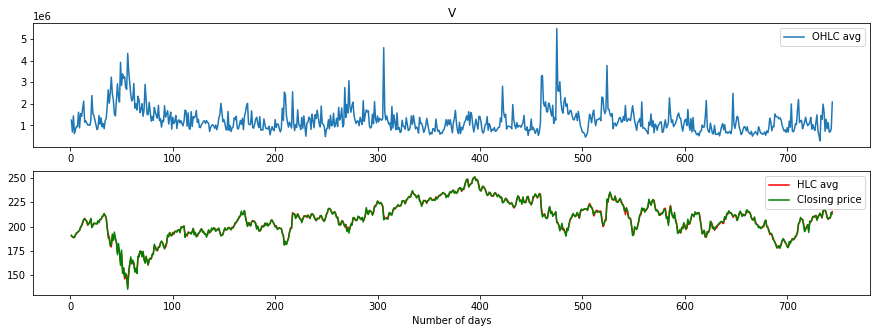

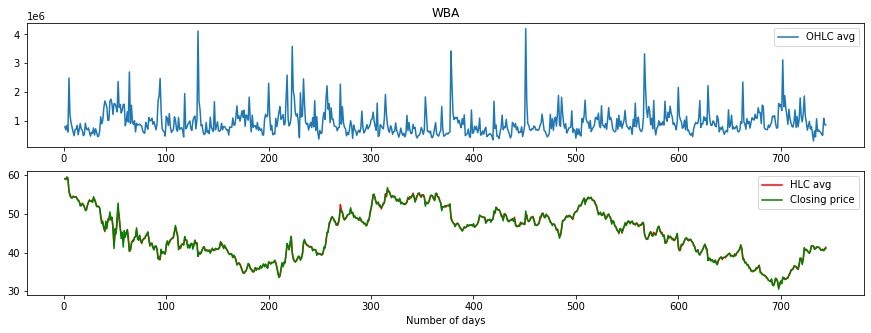

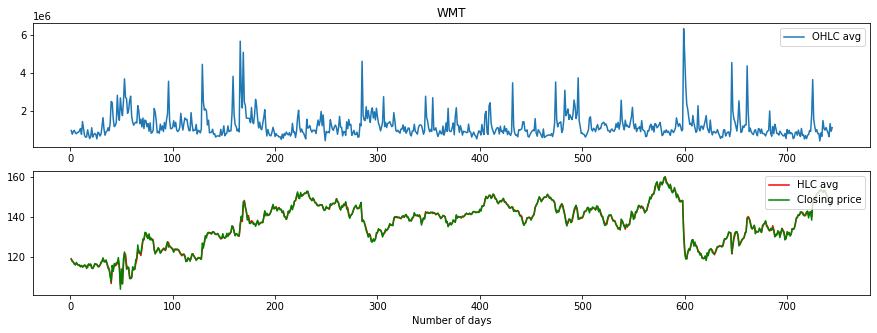

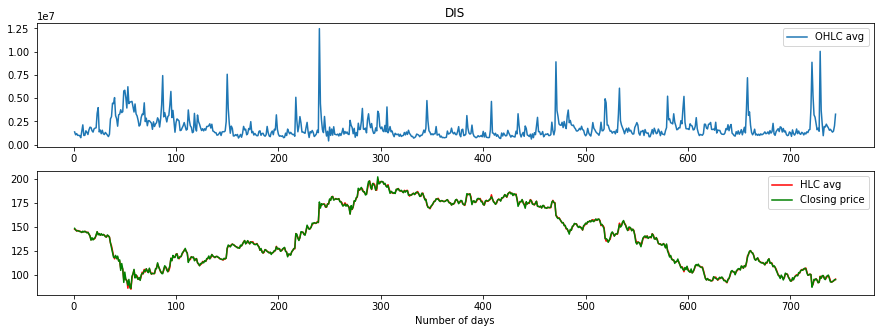

In [ ]:
for EachStock, ticker in zip(StockData,tickers):
    np.random.seed(7)
    obs = np.arange(1, len(EachStock) + 1, 1)
    OHLC_avg = EachStock.mean(axis = 1)
    HLC_avg = EachStock[['High', 'Low', 'Close']].mean(axis = 1)
    close_val= EachStock[['Close']]
    plt.figure(figsize=(15,5))
    subplot(2,1,1)
    plt.plot(obs, OHLC_avg, label = 'OHLC avg')
    plt.legend(loc = 'upper right')
    plt.title(ticker)
    
    subplot(2,1,2)
    plt.plot(obs, HLC_avg,'r', label = 'HLC avg')
    plt.plot(obs, close_val, 'g', label = 'Closing price')
    plt.legend(loc = 'upper right')
    plt.xlabel('Number of days')
    #print(HLC_avg)
    print('\n\n\n')
    plt.show()

    #color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))


Mmm
Epoch 1/10
556/556 - 5s - loss: 0.3784 - 5s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2979 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2449 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.2023 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1668 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1368 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1118 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0911 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0744 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0611 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of MMM 23.07
Test RMSE of MMM 20.54


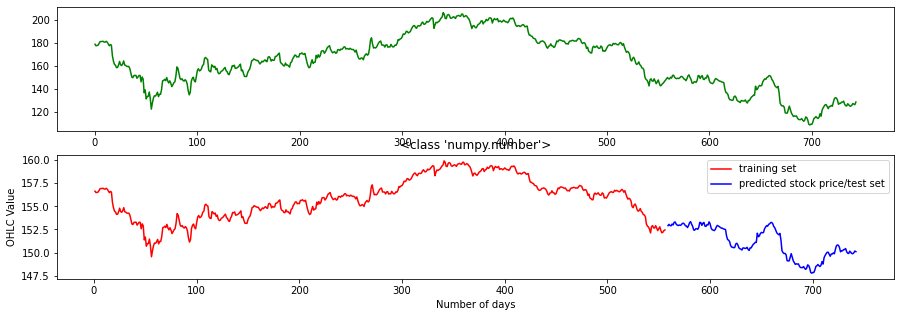

1/1 [==============================] - 0s 18ms/step
Last Day Value of MMM 150.1051483154297
Next Day Value ofMMM [[159.91046]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Axp
Epoch 1/10
556/556 - 4s - loss: 0.2640 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2122 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1804 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1562 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1367 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1206 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1073 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0962 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0870 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0794 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of AXP 34.99
Test RMSE of AXP 40.01


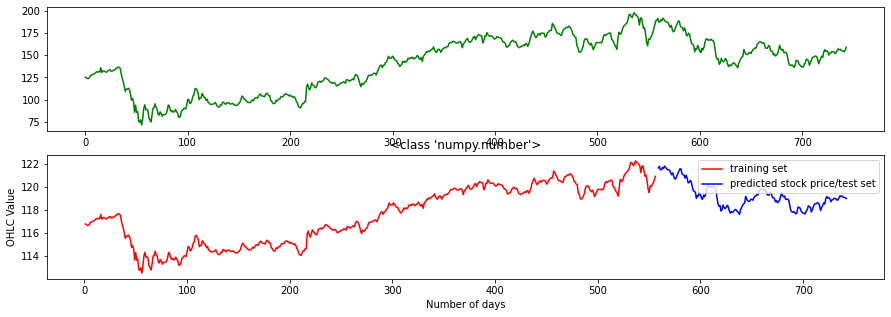

1/1 [==============================] - 0s 19ms/step
Last Day Value of AXP 119.00552368164062
Next Day Value ofAXP [[122.293365]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Amgn
Epoch 1/10
556/556 - 4s - loss: 0.1603 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.1222 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.0994 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.0824 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.0691 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.0585 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.0499 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0430 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0375 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0330 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of AMGN 18.57
Test RMSE of AMGN 34.17


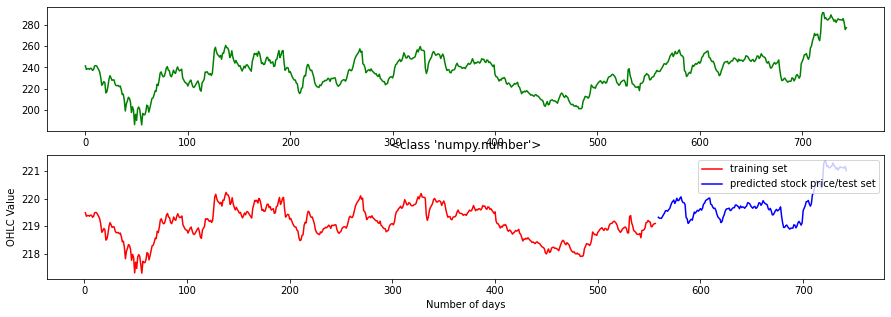

1/1 [==============================] - 0s 18ms/step
Last Day Value of AMGN 221.02195739746094
Next Day Value ofAMGN [[221.37984]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Aapl
Epoch 1/10
556/556 - 5s - loss: 0.2897 - 5s/epoch - 9ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2421 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2106 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1853 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1638 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1451 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1290 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1149 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.1027 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0922 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of AAPL 37.03
Test RMSE of AAPL 51.68


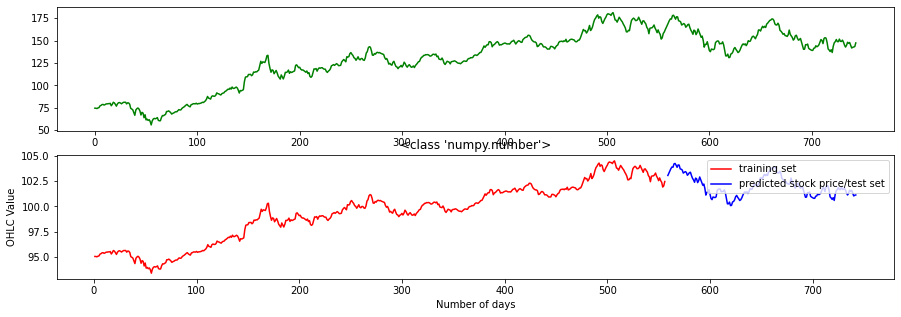

1/1 [==============================] - 0s 18ms/step
Last Day Value of AAPL 101.131591796875
Next Day Value ofAAPL [[104.50729]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Ba
Epoch 1/10
556/556 - 5s - loss: 0.1833 - 5s/epoch - 9ms/step
Epoch 2/10
556/556 - 1s - loss: 0.1354 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1079 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.0884 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.0737 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.0625 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.0539 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0472 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0422 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0383 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of BA 47.87
Test RMSE of BA 35.65


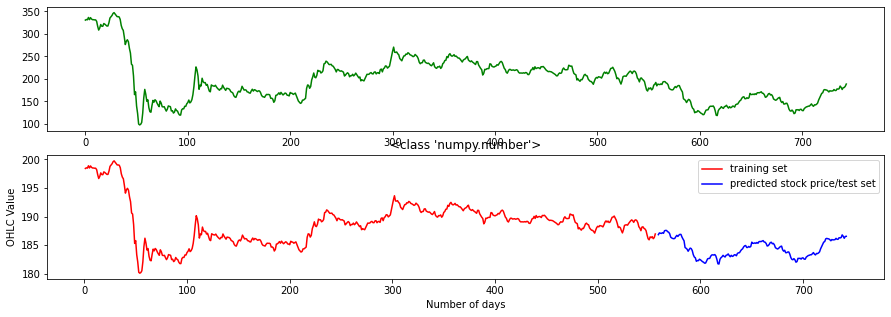

1/1 [==============================] - 0s 18ms/step
Last Day Value of BA 186.54319763183594
Next Day Value ofBA [[199.75201]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Cat
Epoch 1/10
556/556 - 5s - loss: 0.3197 - 5s/epoch - 9ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2617 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2231 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1920 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1660 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1439 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1251 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1094 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0962 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0854 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of CAT 43.35
Test RMSE of CAT 49.01


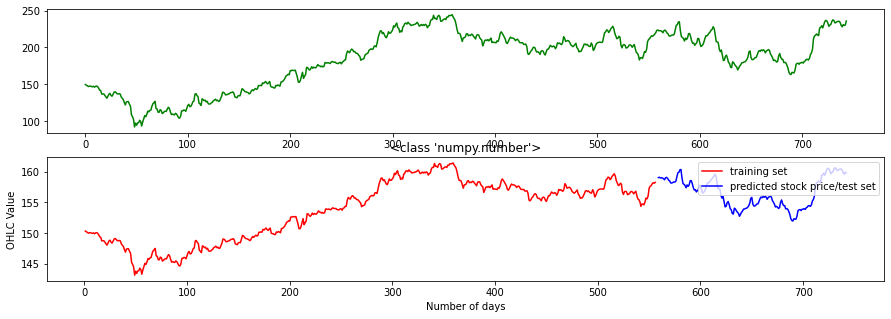

1/1 [==============================] - 0s 27ms/step
Last Day Value of CAT 159.77471923828125
Next Day Value ofCAT [[161.4141]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Cvx
Epoch 1/10
556/556 - 4s - loss: 0.0957 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.0684 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.0539 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.0442 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.0372 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.0320 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.0282 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0254 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0233 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0217 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of CVX 19.07
Test RMSE of CVX 69.20


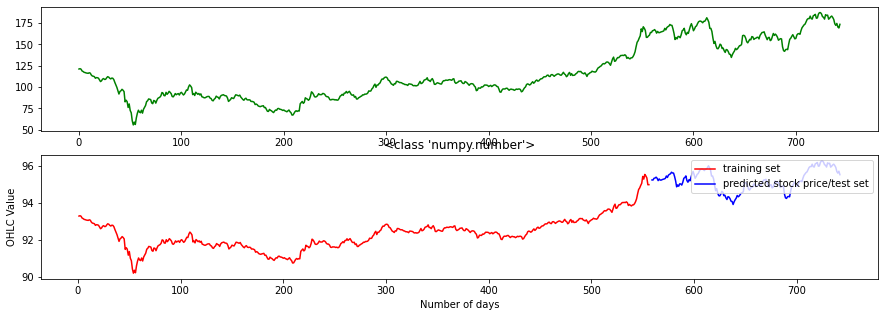

1/1 [==============================] - 0s 26ms/step
Last Day Value of CVX 95.5246810913086
Next Day Value ofCVX [[96.27289]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Csco
Epoch 1/10
556/556 - 4s - loss: 0.2534 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2067 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1776 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1551 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1365 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1208 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1074 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0959 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0861 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0778 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of CSCO 8.11
Test RMSE of CSCO 4.46


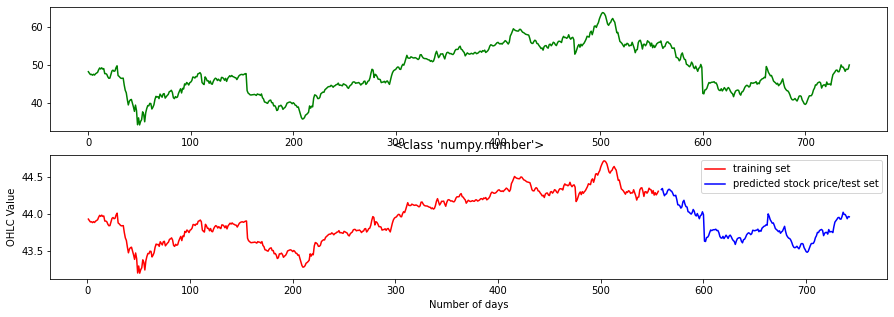

1/1 [==============================] - 0s 18ms/step
Last Day Value of CSCO 43.96406555175781
Next Day Value ofCSCO [[44.72184]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Ko
Epoch 1/10
556/556 - 4s - loss: 0.2488 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.1968 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1637 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1376 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1162 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.0982 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.0831 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0705 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0601 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0515 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of KO 6.20
Test RMSE of KO 12.98


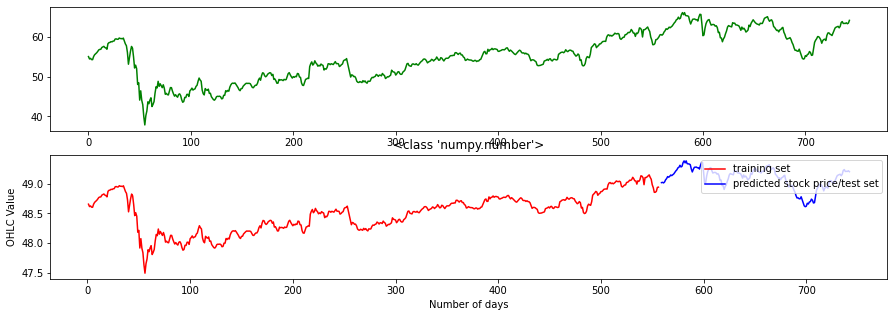

1/1 [==============================] - 0s 18ms/step
Last Day Value of KO 49.20296859741211
Next Day Value ofKO [[49.38536]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Dow
Epoch 1/10
556/556 - 4s - loss: 0.3718 - 4s/epoch - 7ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2980 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2501 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.2117 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1794 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1517 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1280 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1080 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0913 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0776 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of DOW 12.71
Test RMSE of DOW 12.74


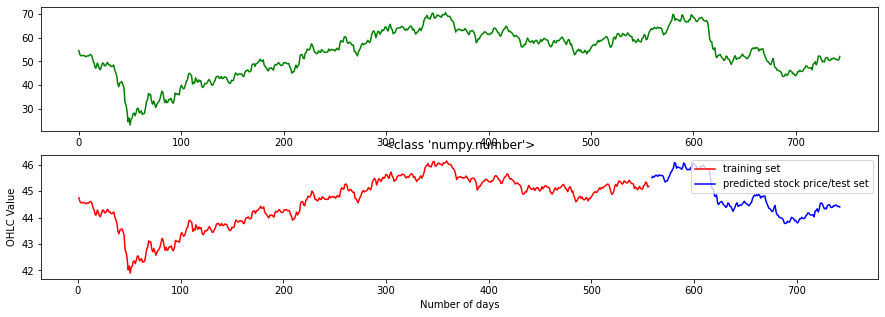

1/1 [==============================] - 0s 19ms/step
Last Day Value of DOW 44.39995574951172
Next Day Value ofDOW [[46.15119]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Gs
Epoch 1/10
556/556 - 4s - loss: 0.3414 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2868 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2515 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.2233 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1996 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1792 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1615 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1462 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.1328 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.1213 - 1s/epoch - 3ms/step
6/6 [==============================] - 0s 6ms/step




Train RMSE of GS 96.40
Test RMSE of GS 91.00


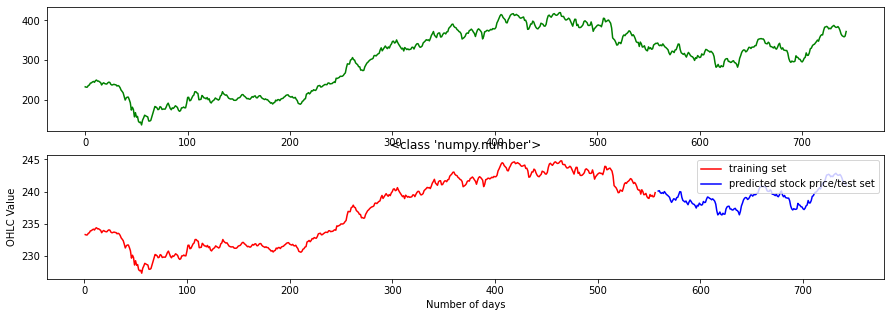

1/1 [==============================] - 0s 18ms/step
Last Day Value of GS 241.0877685546875
Next Day Value ofGS [[244.78307]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Hd
Epoch 1/10
556/556 - 4s - loss: 0.2775 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2281 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1966 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1716 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1505 - 1s/epoch - 3ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1325 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1169 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1034 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0917 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0816 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of HD 72.63
Test RMSE of HD 56.04


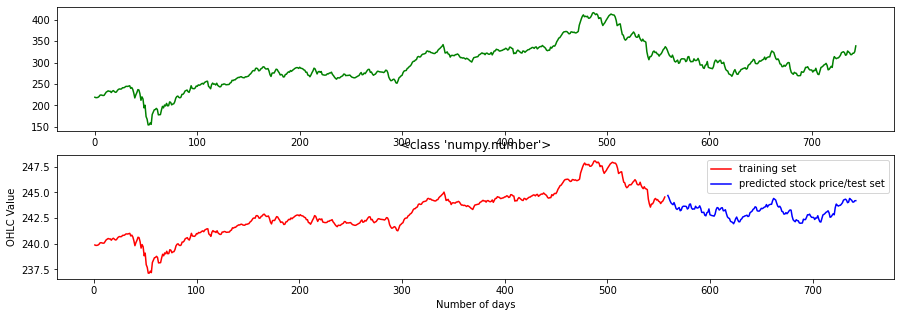

1/1 [==============================] - 0s 21ms/step
Last Day Value of HD 244.20130920410156
Next Day Value ofHD [[248.0794]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Hon
Epoch 1/10
556/556 - 5s - loss: 0.4215 - 5s/epoch - 9ms/step
Epoch 2/10
556/556 - 1s - loss: 0.3448 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2922 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.2489 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.2118 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1799 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1525 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1292 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.1097 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0937 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of HON 37.77
Test RMSE of HON 28.00


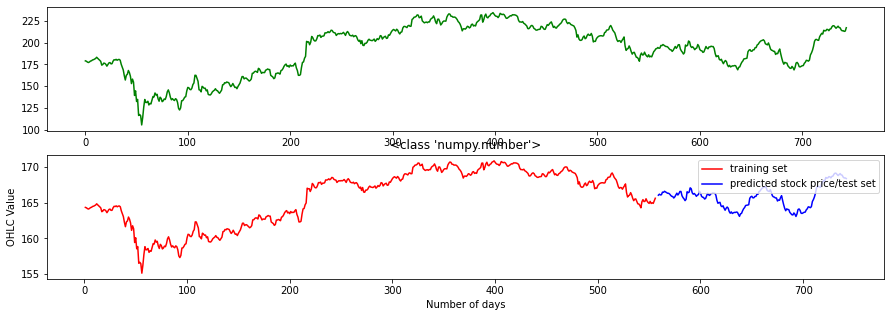

1/1 [==============================] - 0s 18ms/step
Last Day Value of HON 168.3910675048828
Next Day Value ofHON [[170.87553]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Intc
Epoch 1/10
556/556 - 4s - loss: 0.4269 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.3530 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 2s - loss: 0.3009 - 2s/epoch - 4ms/step
Epoch 4/10
556/556 - 1s - loss: 0.2567 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.2176 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1826 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1515 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1241 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.1004 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0803 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of INTC 11.40
Test RMSE of INTC 9.23


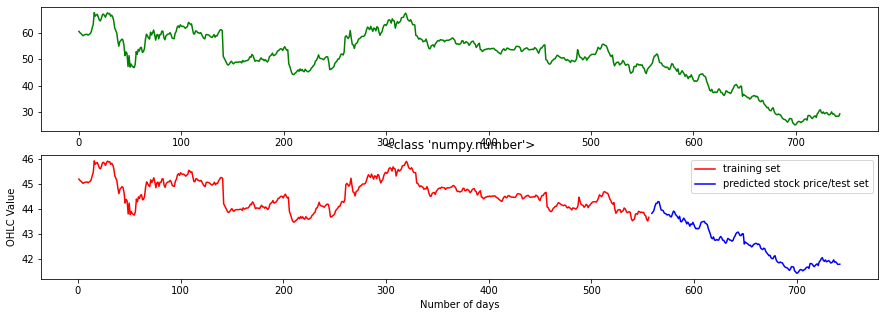

1/1 [==============================] - 0s 17ms/step
Last Day Value of INTC 41.80310821533203
Next Day Value ofINTC [[45.934875]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Ibm
Epoch 1/10
556/556 - 5s - loss: 0.2853 - 5s/epoch - 9ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2324 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1968 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1677 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1430 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1217 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1034 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0877 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0744 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0633 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of IBM 14.68
Test RMSE of IBM 20.89


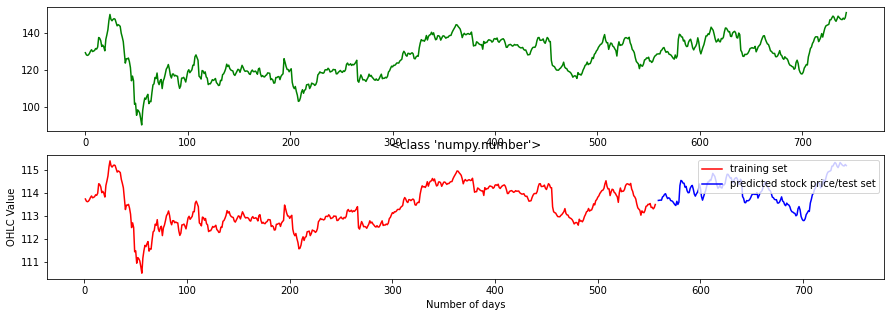

1/1 [==============================] - 0s 18ms/step
Last Day Value of IBM 115.19750213623047
Next Day Value ofIBM [[115.481674]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Jnj
Epoch 1/10
556/556 - 4s - loss: 0.3325 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2747 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2361 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.2046 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1775 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1537 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1328 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1143 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0982 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0842 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of JNJ 19.85
Test RMSE of JNJ 32.49


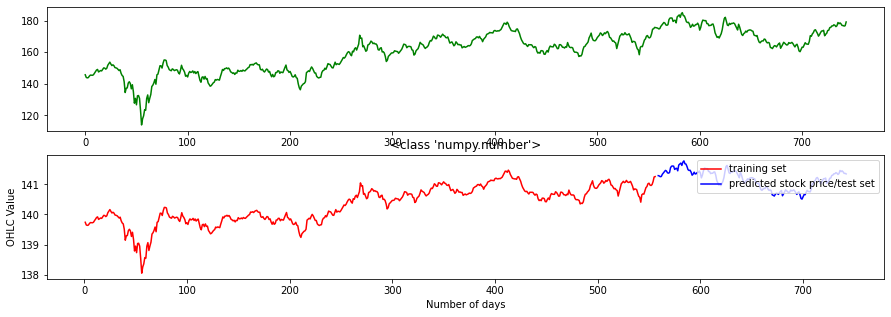

1/1 [==============================] - 0s 18ms/step
Last Day Value of JNJ 141.34738159179688
Next Day Value ofJNJ [[141.78104]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Jpm
Epoch 1/10
556/556 - 4s - loss: 0.3517 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2900 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2498 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.2175 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1904 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1673 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1476 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1308 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.1167 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.1050 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of JPM 28.70
Test RMSE of JPM 9.92


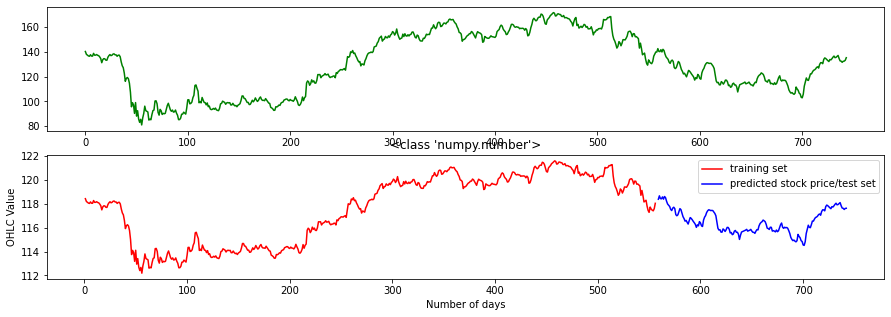

1/1 [==============================] - 0s 27ms/step
Last Day Value of JPM 117.62735748291016
Next Day Value ofJPM [[121.594696]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Mcd
Epoch 1/10
556/556 - 4s - loss: 0.3245 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2609 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2188 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1849 - 1s/epoch - 3ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1563 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1317 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1107 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0928 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0778 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0653 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 5ms/step




Train RMSE of MCD 35.08
Test RMSE of MCD 57.74


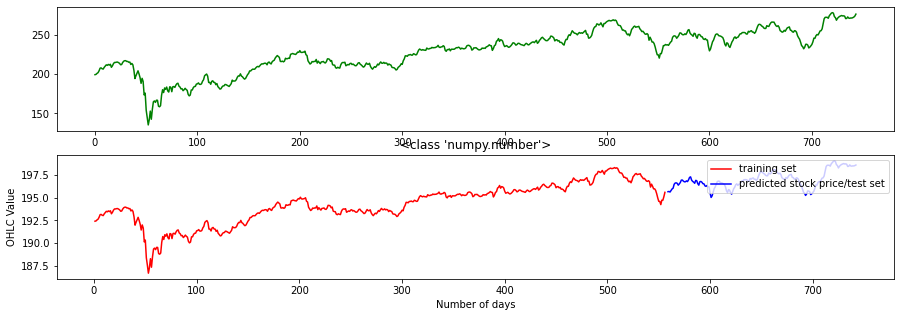

1/1 [==============================] - 0s 17ms/step
Last Day Value of MCD 198.6155548095703
Next Day Value ofMCD [[199.07336]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Mrk
Epoch 1/10
556/556 - 4s - loss: 0.0507 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.0340 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.0256 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.0202 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.0165 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.0138 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.0119 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0106 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0096 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0088 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of MRK 4.19
Test RMSE of MRK 17.87


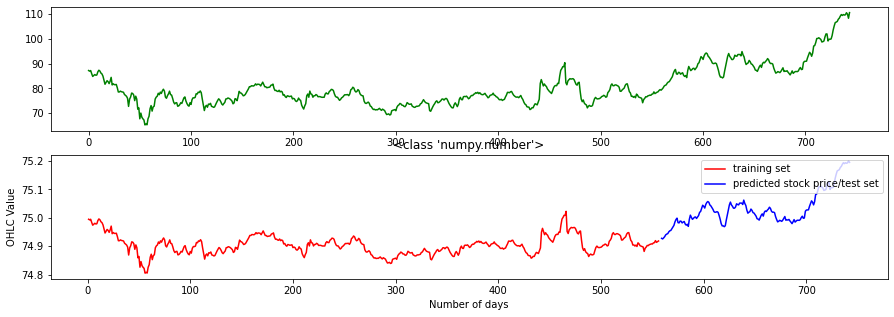

1/1 [==============================] - 0s 20ms/step
Last Day Value of MRK 75.19559478759766
Next Day Value ofMRK [[75.20121]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Msft
Epoch 1/10
556/556 - 4s - loss: 0.2589 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2094 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1780 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1536 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1338 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1173 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1035 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0920 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0825 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0748 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of MSFT 55.27
Test RMSE of MSFT 50.91


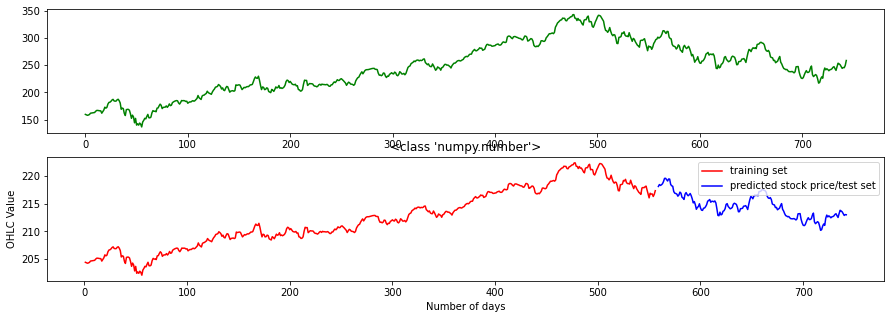

1/1 [==============================] - 0s 19ms/step
Last Day Value of MSFT 213.00845336914062
Next Day Value ofMSFT [[222.39671]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Nke
Epoch 1/10
556/556 - 4s - loss: 0.3306 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2678 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2276 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1959 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1694 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1468 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1275 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1110 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0971 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0854 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of NKE 32.07
Test RMSE of NKE 11.81


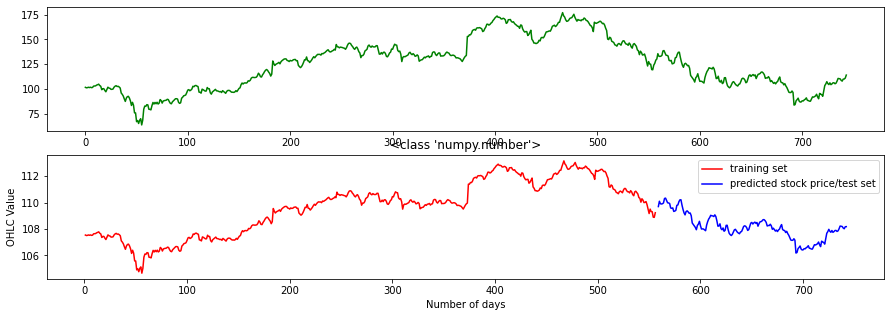

1/1 [==============================] - 0s 18ms/step
Last Day Value of NKE 108.18353271484375
Next Day Value ofNKE [[113.16855]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Pg
Epoch 1/10
556/556 - 5s - loss: 0.2949 - 5s/epoch - 9ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2406 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2046 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1755 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1509 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1298 - 1s/epoch - 3ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1116 - 1s/epoch - 3ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0959 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0827 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0716 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of PG 16.81
Test RMSE of PG 21.51


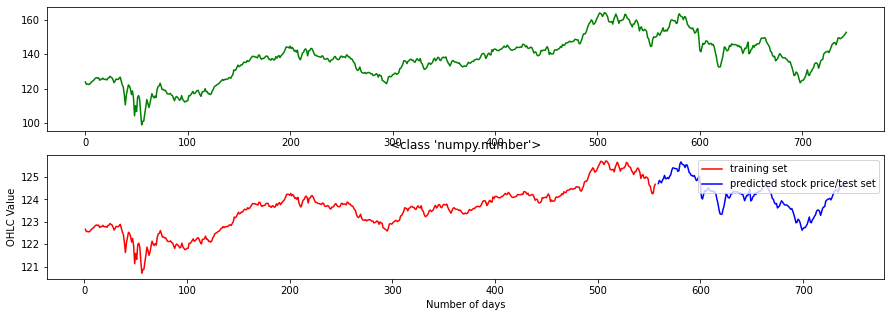

1/1 [==============================] - 0s 18ms/step
Last Day Value of PG 124.73876953125
Next Day Value ofPG [[125.71412]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Crm
Epoch 1/10
556/556 - 4s - loss: 0.2635 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2105 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1768 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1507 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1293 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1115 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.0966 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0842 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0738 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0653 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 5ms/step




Train RMSE of CRM 45.42
Test RMSE of CRM 28.63


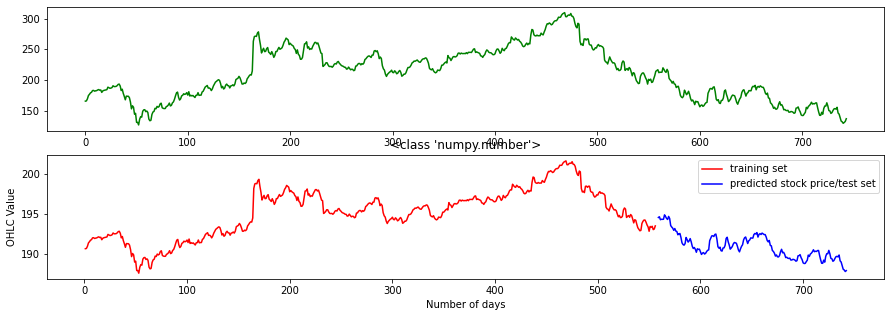

1/1 [==============================] - 0s 28ms/step
Last Day Value of CRM 187.92794799804688
Next Day Value ofCRM [[201.58157]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Trv
Epoch 1/10
556/556 - 5s - loss: 0.2430 - 5s/epoch - 9ms/step
Epoch 2/10
556/556 - 1s - loss: 0.1858 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1505 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1237 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1025 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.0855 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.0720 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0614 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0531 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0467 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step




Train RMSE of TRV 22.45
Test RMSE of TRV 41.17


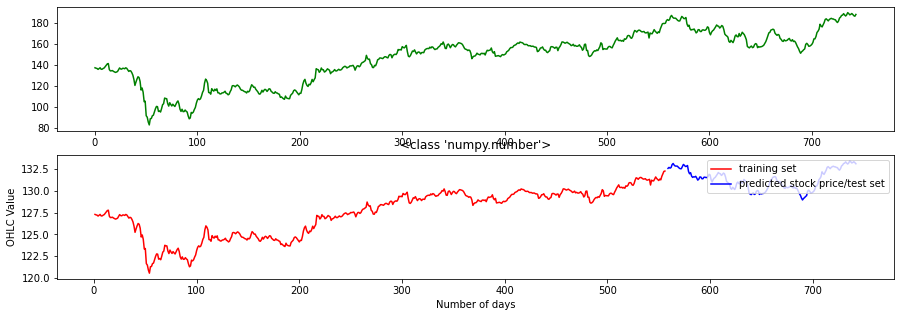

1/1 [==============================] - 0s 19ms/step
Last Day Value of TRV 133.099365234375
Next Day Value ofTRV [[133.43353]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Unh
Epoch 1/10
556/556 - 4s - loss: 0.2082 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.1662 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1407 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1213 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1057 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.0929 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.0821 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0732 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0657 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0595 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of UNH 85.08
Test RMSE of UNH 202.10


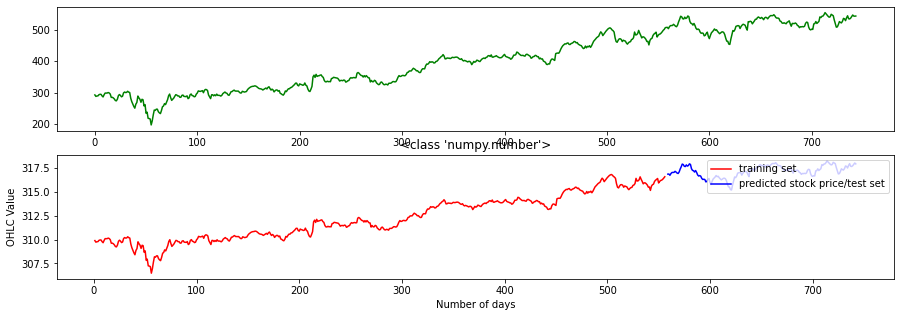

1/1 [==============================] - 0s 25ms/step
Last Day Value of UNH 317.93475341796875
Next Day Value ofUNH [[318.25455]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Vz
Epoch 1/10
556/556 - 4s - loss: 0.5101 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.3982 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.3185 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.2517 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1945 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1464 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1072 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0766 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0536 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0370 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 5ms/step




Train RMSE of VZ 4.59
Test RMSE of VZ 6.42


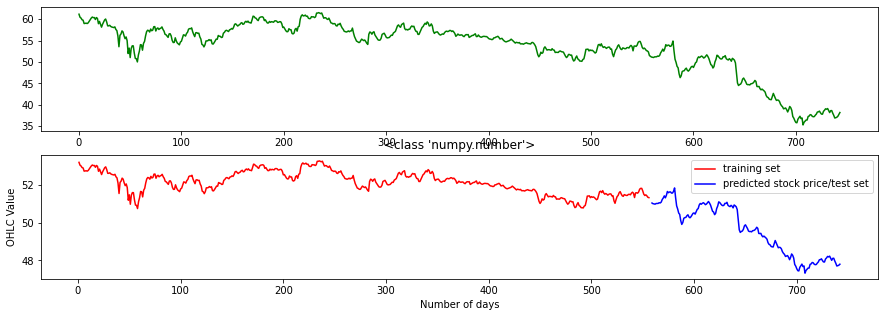

1/1 [==============================] - 0s 22ms/step
Last Day Value of VZ 47.80113983154297
Next Day Value ofVZ [[53.27565]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


V
Epoch 1/10
556/556 - 4s - loss: 0.3451 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2678 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2181 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1786 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1460 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1188 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.0963 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0780 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0634 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0520 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of V 24.26
Test RMSE of V 16.23


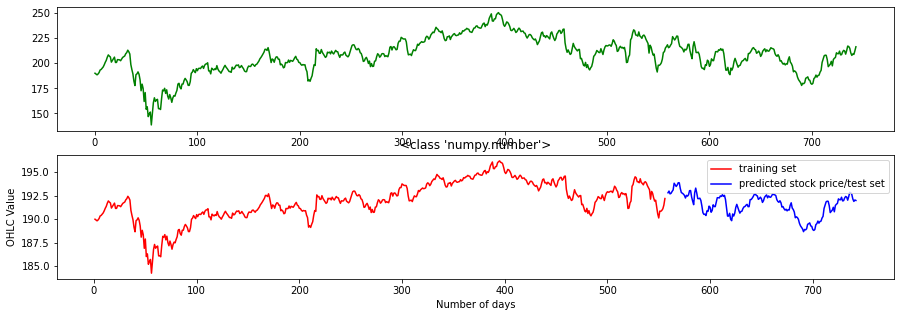

1/1 [==============================] - 0s 18ms/step
Last Day Value of V 191.97406005859375
Next Day Value ofV [[196.1842]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Wba
Epoch 1/10
556/556 - 4s - loss: 0.2809 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2277 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1931 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 1s - loss: 0.1656 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1425 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1228 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1060 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0917 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0796 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0694 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of WBA 7.12
Test RMSE of WBA 4.05


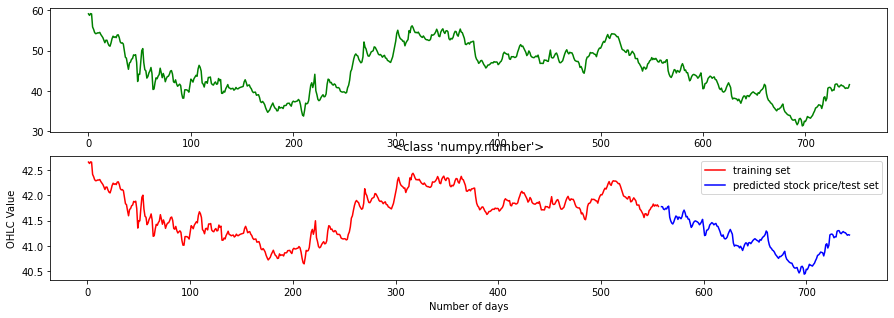

1/1 [==============================] - 0s 20ms/step
Last Day Value of WBA 41.21471405029297
Next Day Value ofWBA [[42.660233]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Wmt
Epoch 1/10
556/556 - 4s - loss: 0.2868 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2335 - 1s/epoch - 3ms/step
Epoch 3/10
556/556 - 1s - loss: 0.1988 - 1s/epoch - 2ms/step
Epoch 4/10
556/556 - 2s - loss: 0.1709 - 2s/epoch - 3ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1473 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1269 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1094 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.0943 - 1s/epoch - 3ms/step
Epoch 9/10
556/556 - 1s - loss: 0.0815 - 1s/epoch - 3ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0707 - 1s/epoch - 3ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of WMT 13.81
Test RMSE of WMT 15.03


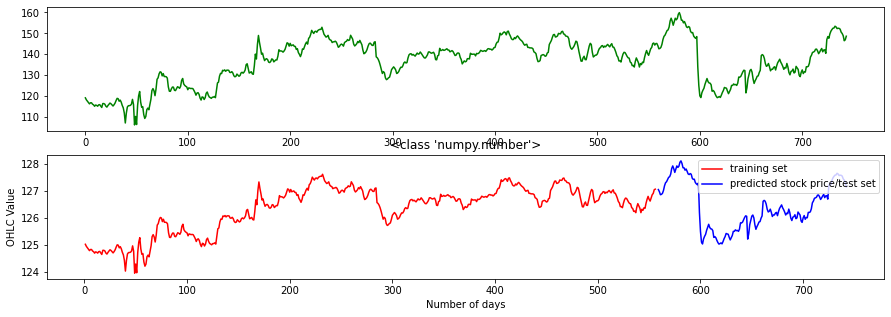

1/1 [==============================] - 0s 21ms/step
Last Day Value of WMT 127.13872528076172
Next Day Value ofWMT [[128.10548]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


Dis
Epoch 1/10
556/556 - 4s - loss: 0.3355 - 4s/epoch - 8ms/step
Epoch 2/10
556/556 - 1s - loss: 0.2749 - 1s/epoch - 2ms/step
Epoch 3/10
556/556 - 1s - loss: 0.2360 - 1s/epoch - 3ms/step
Epoch 4/10
556/556 - 1s - loss: 0.2050 - 1s/epoch - 2ms/step
Epoch 5/10
556/556 - 1s - loss: 0.1788 - 1s/epoch - 2ms/step
Epoch 6/10
556/556 - 1s - loss: 0.1563 - 1s/epoch - 2ms/step
Epoch 7/10
556/556 - 1s - loss: 0.1367 - 1s/epoch - 2ms/step
Epoch 8/10
556/556 - 1s - loss: 0.1199 - 1s/epoch - 2ms/step
Epoch 9/10
556/556 - 1s - loss: 0.1054 - 1s/epoch - 2ms/step
Epoch 10/10
556/556 - 1s - loss: 0.0932 - 1s/epoch - 2ms/step
6/6 [==============================] - 0s 4ms/step




Train RMSE of DIS 33.87
Test RMSE of DIS 21.98


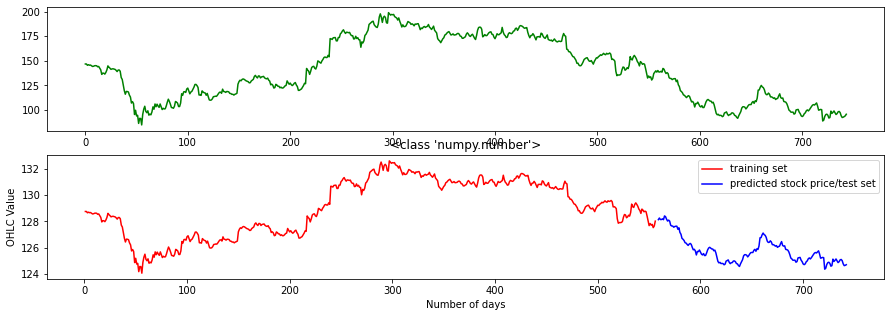

1/1 [==============================] - 0s 18ms/step
Last Day Value of DIS 124.70576477050781
Next Day Value ofDIS [[132.61104]]


Positive cluster






<ipython-input-25-b160704b7e0e>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  last_val = np.asscalar(last_val)


In [ ]:
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)
 
BullStock = [] # For stocks showing upward trend
BearStock = [] # For stocks showing downward trend

for Eachstock,ticker in zip(StockData, tickers):
# Selecting the necessary attributes for prediction 
    OHLC_avg = Eachstock[['Open','High', 'Low', 'Close']].mean(axis = 1)
    HLC_avg = Eachstock[['High', 'Low', 'Close']].mean(axis = 1)
    close_val= Eachstock[['Close']]
    
# Converting to time series    
    OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    OHLC_avg = scaler.fit_transform(OHLC_avg)
    
# Splitting
    train_OHLC = int(len(OHLC_avg) * 0.75)
    test_OHLC = len(OHLC_avg) - train_OHLC
    train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

# TIME-SERIES DATASET FOR TIME T, VALUES FOR TIME T+1
    trainX, trainY = new_dataset(train_OHLC, 1)
    testX, testY = new_dataset(test_OHLC, 1)

# Reshaping
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    step_size = 1

# LSTM MODEL
    model = Sequential()
    model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
    model.add(LSTM(16))
    model.add(Dense(1))
    model.add(Activation('linear'))
    print(ticker.capitalize())
# Training
    model.compile(loss='mean_squared_error', optimizer='adagrad') 
    model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# Predicting 
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    print('\n\n\n')
    
    
# Output, Error and Plotting 
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])


# Trainng RMSE
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train RMSE of '+ticker+' %.2f' % (trainScore))

# Test RMSE
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test RMSE of '+ticker+' %.2f' % (testScore))

# Plotting
    trainPredictPlot = np.empty_like(OHLC_avg)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

    testPredictPlot = np.empty_like(OHLC_avg)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

    OHLC_avg = scaler.inverse_transform(OHLC_avg)


    plt.figure(figsize=(15,5))
    subplot(2,1,1)
    plt.plot(OHLC_avg, 'g', label = 'original dataset')
    subplot(2,1,2)
    plt.title(number)
    plt.plot(trainPredictPlot, 'r', label = 'training set')
    plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
    plt.legend(loc = 'upper right')
    plt.xlabel('Number of days')
    plt.ylabel('OHLC Value')
    plt.show()
    # PREDICT FUTURE VALUES
    last_val = testPredict[-1]
    last_val_scaled = last_val/last_val
    next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
    next_val = scaler.inverse_transform(next_val)
    
    #print(f"Raw value of next val is {next_val}")
    #print(f"Scaled value of next val is {}")
    
    last_val = np.asscalar(last_val)
    #next_val = np.asscalar(last_val*next_val)
    print ("Last Day Value of "+ticker, last_val)
    print ("Next Day Value of"+ticker, next_val)
    print('\n')
    if last_val > next_val:
        print('Negative cluster')
        BearStock.append(ticker)
    else:
        print('Positive cluster')
        BullStock.append(ticker)
    print('\n\n\n')

